In [31]:
## Importing required libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.stats import proportion as pr
import statsmodels.stats.api as sms

#  EDA

## The Data Review Process

In [32]:
#Loading the Superstore dataset into a DataFrame
df_=pd.read_excel("5uperstore.xlsx",header=0)
df_

,Row ID,Order ID,Order Date,Shipment Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [33]:
#Creating a copy of the dataframe**
df=df_.copy()

In [34]:
#Displaying the column names of the dataframe
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Shipment Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
#Retrieving the dimensions of the dataframe (rows and columns)
df.shape

(9994, 21)

In [36]:
#Selecting specific columns from the dataframe for correlation analysis
df_corr=df[["Sales","Quantity","Discount","Profit"]]

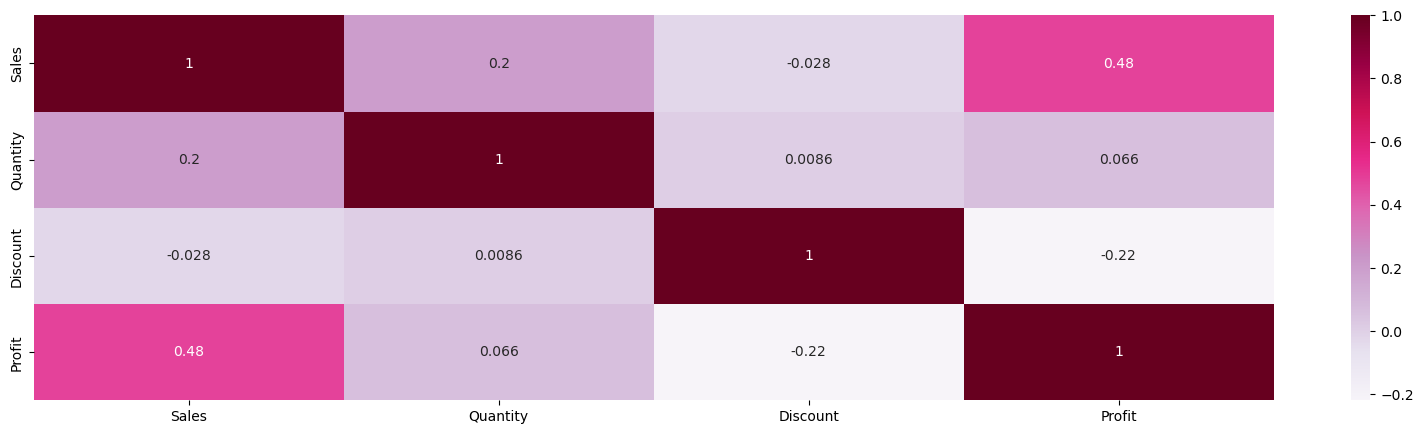

In [37]:
#Calculating the correlation matrix and visualizing it as a heatmap
df_corr.corr()
sns.heatmap(df_corr.corr(),cmap='PuRd',annot=True);
plt.rcParams['figure.figsize']=(20,5)

In [38]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Shipment Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
#Removing unused columns:
df = df.drop(['Row ID', 'Country', 'Postal Code'], axis=1)


In [40]:
df.columns

Index(['Order ID', 'Order Date', 'Shipment Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [41]:
#Displaying a summary of the dataframe's structure, including data types and non-null counts:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Shipment Date  9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  Product Name   9994 non-null   object        
 14  Sales          9994 non-null   float64       
 15  Quantity       9994 n

In [979]:
#Generating descriptive statistics for the 'Sales' and 'Profit' columns, transposed for easier reading
df[["Sales","Profit"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.000,229.858,623.245,0.444,17.280,54.490,209.940,22638.480
Profit,9994.000,28.657,234.260,-6599.978,1.729,8.666,29.364,8399.976


In [42]:
#Generating descriptive statistics for all numerical columns in the DataFrame
df.describe()

,Order Date,Shipment Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


In [43]:
## Calculating Unit Price, Profit per Unit, and Cost per Unit based on Sales, Quantity, and Profit:
df["Unit Price"]=df["Sales"]/df["Quantity"]
df["ProfitperUnit"]=df["Profit"]/df["Quantity"]
df["CostperUnit"]=df["Unit Price"]-df["ProfitperUnit"]


In [45]:
# Calculating the Percentage of Profit based on Profit per Unit and Cost per Unit
df["PercentageofProfit"] = df["ProfitperUnit"] / df["CostperUnit"] * 100

#Formatting the Percentage of Profit values as strings with one decimal place and a percent sign
df["PercentageofProfit"] = df["PercentageofProfit"].apply(lambda x: '{:.1f}%'.format(x))
df.head()

,Order ID,Order Date,Shipment Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price,ProfitperUnit,CostperUnit,PercentageofProfit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,20.9568,110.0232,19.0%
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,73.1940,170.7860,42.9%
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,3.4357,3.8743,88.7%
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-76.6062,268.1217,-28.6%
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,1.2582,9.9258,12.7%


In [983]:
df.columns


Index(['Order ID', 'Order Date', 'Shipment Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Unit Price', 'ProfitperUnit', 'CostperUnit', 'PercentageofProfit'], dtype='object')

In [46]:
# Creating a new column for the month name extracted from the "Order Date" column
df["Order Month"] = pd.to_datetime(df["Order Date"]).dt.month_name()

In [47]:
# Creating a new column for the year extracted from the "Order Date" column
df["Order Year"] = pd.to_datetime(df["Order Date"]).dt.strftime("%Y")
df[["Order Year"]]

,Order Year
0,2016
1,2016
2,2016
3,2015
4,2015
...,...
9989,2014
9990,2017
9991,2017
9992,2017


## Outlier Treatment

In [986]:
# Calculating Outliers

In [48]:
# Calculating the 80th and 20th percentiles of the "Sales" column
q3=df["Sales"].quantile(0.80)
q1=df["Sales"].quantile(0.20)
print(q3)
print(q1)

281.372
13.776


In [49]:
# Calculating the Interquartile Range (IQR) by subtracting the 20th percentile (Q1) from the 80th percentile (Q3)
IQR=q3-q1
IQR

267.596

In [50]:
# Calculating the lower and upper limits for detecting outliers based on the Interquartile Range (IQR) method
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

-387.618
682.7660000000001


In [51]:
df[df["Sales"]>1680].shape

(190, 24)

In [55]:
df[df["Sales"]<-997].shape

(0, 24)

In [56]:
# Function for Outliers

In [57]:
def outliers(dataframe, col, new_name):
    q3 = dataframe[col].quantile(0.90)
    q1 = dataframe[col].quantile(0.1)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    dataframe[new_name] = dataframe[col].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return lower_limit,upper_limit

In [58]:
outliers(df,"Sales","Sales")

(-839.3160000000001, 1419.9192000000003)

In [59]:
outliers(df,"Quantity","Quantity")

(-5.5, 14.5)

In [60]:
outliers(df,"Profit","Profit")

(-172.60608000000008, 246.41424000000015)

In [61]:
df[df["Profit"]>500].shape

(0, 24)

In [62]:
df[df["Profit"]<-385].shape

(0, 24)

In [63]:
df[df["Sales"]>2384].shape

(0, 24)

In [64]:
df.columns

Index(['Order ID', 'Order Date', 'Shipment Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Unit Price', 'ProfitperUnit', 'CostperUnit',
       'PercentageofProfit', 'Order Month', 'Order Year'],
      dtype='object')

In [67]:
##############################################################
# Calculating RFM Metrics
###############################################################

# Recency, Frequency, Monetary


# Today's date - Last purchase

print(df["Order Date"].max())


2017-12-30 00:00:00


In [68]:
# Setting a reference date for RFM metrics calculation:
today_date = dt.datetime(2018, 1, 1)
print(today_date)

2018-01-01 00:00:00


In [1003]:
df.columns

Index(['Order ID', 'Order Date', 'Shipment Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Unit Price', 'ProfitperUnit', 'CostperUnit', 'PercentageofProfit', 'Order Month', 'Order Year'], dtype='object')

In [69]:
df.groupby('Customer ID').agg({"Order Date": lambda date: (today_date - date.max()).days}).head()#Recency

,Order Date
Customer ID,
AA-10315,186
AA-10375,21
AA-10480,261
AA-10645,57
AB-10015,417


In [70]:
df["Tenure"]=df["Order Date"] # Creating a new column for tenure, as "Order Date" will be used twice

In [71]:
# Calculating RFM metrics:
rfm = df.groupby(['Customer ID',"Customer Name"]).agg({'Order Date': lambda date: (today_date - date.max()).days,
                                     'Tenure': lambda date: (today_date - date.min()).days,
                                     'Order ID': lambda num: num.nunique(),
                                     'Sales': lambda sales: sales.sum()}).sort_values("Tenure",ascending=False)
rfm.head()
                                     

,,Order Date,Tenure,Order ID,Sales
Customer ID,Customer Name,,,,
DP-13000,Darren Powers,128,1459,9,1050.6360
PO-19195,Phillina Ober,88,1458,5,1056.8580
MB-18085,Mick Brown,46,1457,7,1428.2310
JO-15145,Jack O'Briant,59,1456,9,3108.9882
ME-17320,Maria Etezadi,44,1456,10,7905.8184


In [72]:
# Renaming the columns correctly:
rfm.columns = ['Recency', 'Tenure', 'Frequency','Monetary']
rfm.head()

,,Recency,Tenure,Frequency,Monetary
Customer ID,Customer Name,,,,
DP-13000,Darren Powers,128,1459,9,1050.6360
PO-19195,Phillina Ober,88,1458,5,1056.8580
MB-18085,Mick Brown,46,1457,7,1428.2310
JO-15145,Jack O'Briant,59,1456,9,3108.9882
ME-17320,Maria Etezadi,44,1456,10,7905.8184


In [73]:
##############################################################
# Calculating RFM Scores
###############################################################



In [74]:
rfm["RecencyScore"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

In [75]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [76]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [77]:
rfm["TenureScore"] = pd.qcut(rfm['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [78]:
pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"])

FrequencyScore,1,2,3,4,5
Frequency,,,,,
1,12,0,0,0,0
2,34,0,0,0,0
3,53,0,0,0,0
4,60,36,0,0,0
5,0,122,12,0,0
6,0,0,107,0,0
7,0,0,40,76,0
8,0,0,0,82,0
9,0,0,0,0,71


In [79]:
rfm['RecencyScore'].value_counts()

RecencyScore
5    162
3    159
1    159
2    157
4    156
Name: count, dtype: int64

In [83]:
###############################################################
# Naming & Analysing RFM Segments
###############################################################

# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [84]:
# Creating a 'Segment' column by combining 'RecencyScore' and 'FrequencyScore' as strings
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,Segment
Customer ID,Customer Name,,,,,,,,,
DP-13000,Darren Powers,128,1459,9,1050.6360,2,5,2,5,25
PO-19195,Phillina Ober,88,1458,5,1056.8580,3,2,2,5,32
MB-18085,Mick Brown,46,1457,7,1428.2310,4,3,2,5,43
JO-15145,Jack O'Briant,59,1456,9,3108.9882,3,5,4,5,35
ME-17320,Maria Etezadi,44,1456,10,7905.8184,4,5,5,5,45


In [85]:
# Updating the 'Segment' column based on the defined segmentation mapping (seg_map) and checking the number of unique customers in the original dataframe.
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()
rfm.head()

,,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,Segment
Customer ID,Customer Name,,,,,,,,,
DP-13000,Darren Powers,128,1459,9,1050.6360,2,5,2,5,Cant_Loose
PO-19195,Phillina Ober,88,1458,5,1056.8580,3,2,2,5,About_to_Sleep
MB-18085,Mick Brown,46,1457,7,1428.2310,4,3,2,5,Potential_Loyalists
JO-15145,Jack O'Briant,59,1456,9,3108.9882,3,5,4,5,Loyal_Customers
ME-17320,Maria Etezadi,44,1456,10,7905.8184,4,5,5,5,Loyal_Customers


In [86]:
rfm[rfm["Segment"]=="Hibernating"]

,,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,Segment
Customer ID,Customer Name,,,,,,,,,
LS-17230,Lycoris Saunders,779,1456,3,368.8800,1,1,1,5,Hibernating
VS-21820,Vivek Sundaresam,223,1455,4,1055.9810,2,1,2,5,Hibernating
MS-17830,Melanie Seite,454,1453,4,370.3480,1,1,1,5,Hibernating
TS-21340,Toby Swindell,228,1443,5,974.7820,1,2,2,5,Hibernating
IM-15055,Ionia McGrath,411,1439,3,1492.5892,1,1,2,5,Hibernating
...,...,...,...,...,...,...,...,...,...,...
RM-19750,Roland Murray,301,301,1,98.3500,1,1,1,1,Hibernating
TM-21490,Tony Molinari,132,277,3,1094.6780,2,1,2,1,Hibernating
MG-18205,Mitch Gastineau,266,266,1,16.7390,1,1,1,1,Hibernating


In [88]:
# Calculating the mean and count of Recency, Frequency, and Monetary values for each customer segment.
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency           Monetary      
                           mean count      mean count         mean count
Segment                                                                 
About_to_Sleep        74.890909    55  3.963636    55  1648.021402    55
At_Risk              223.840000   100  6.660000   100  2764.895628   100
Cant_Loose           212.871795    39  9.974359    39  3400.345300    39
Champions             15.678161    87  9.080460    87  3439.020077    87
Hibernating          374.237288   177  3.757062   177  1385.304326   177
Loyal_Customers       58.444444   153  8.686275   153  3309.519067   153
Need_Attention        80.290323    31  6.258065    31  2520.584361    31
New_Customers         16.722222    18  3.111111    18  1008.669678    18
Potential_Loyalists   27.290598   117  5.555556   117  2201.275816   117
Promising             41.625000    16  3.250000    16  1203.864925    16

In [89]:
# Merging the original DataFrame with the RFM DataFrame based on 'Customer ID' to combine RFM metrics with customer data.
merged_df = pd.merge(df['Customer ID'], rfm, on='Customer ID', how='left')

merged_df

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,Segment
0,CG-12520,340,809,3,1148.7800,1,1,2,1,Hibernating
1,CG-12520,340,809,3,1148.7800,1,1,2,1,Hibernating
2,DV-13045,21,568,5,1119.4830,5,3,2,1,Potential_Loyalists
3,SO-20335,31,813,6,2602.5755,4,3,4,1,Potential_Loyalists
4,SO-20335,31,813,6,2602.5755,4,3,4,1,Potential_Loyalists
...,...,...,...,...,...,...,...,...,...,...
9989,TB-21400,204,1441,7,3553.9492,2,3,4,5,At_Risk
9990,DB-13060,18,1402,7,4531.6460,5,3,5,5,Potential_Loyalists
9991,DB-13060,18,1402,7,4531.6460,5,3,5,5,Potential_Loyalists
9992,DB-13060,18,1402,7,4531.6460,5,3,5,5,Potential_Loyalists


In [90]:
df['Customer Segment'] = merged_df['Segment']
df.head()

,Order ID,Order Date,Shipment Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,Discount,Profit,Unit Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order Month,Order Year,Tenure,Customer Segment
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,0.00,41.91360,130.9800,20.9568,110.0232,19.0%,November,2016,2016-11-08,Hibernating
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,0.00,219.58200,243.9800,73.1940,170.7860,42.9%,November,2016,2016-11-08,Hibernating
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,0.00,6.87140,7.3100,3.4357,3.8743,88.7%,June,2016,2016-06-12,Potential_Loyalists
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,0.45,-172.60608,191.5155,-76.6062,268.1217,-28.6%,October,2015,2015-10-11,Potential_Loyalists
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,0.20,2.51640,11.1840,1.2582,9.9258,12.7%,October,2015,2015-10-11,Potential_Loyalists


###  Creating Loss DataFrame

In [91]:
#Filtering the DataFrame to create a new DataFrame (df_loss) that contains only the rows where the profit is less than zero, indicating a loss.
df_loss=df[df["Profit"]<0]
df_loss

,Order ID,Order Date,Shipment Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,Discount,Profit,Unit Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order Month,Order Year,Tenure,Customer Segment
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,0.45,-172.60608,191.5155,-76.6062,268.1217,-28.6%,October,2015,2015-10-11,Potential_Loyalists
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,Central,...,0.80,-123.85800,13.7620,-24.7716,38.5336,-64.3%,November,2015,2015-11-22,Potential_Loyalists
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,Central,...,0.80,-3.81600,0.8480,-1.2720,2.1200,-60.0%,November,2015,2015-11-22,Potential_Loyalists
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,...,0.30,-1.01960,35.6860,-0.5098,36.1958,-1.4%,July,2017,2017-07-16,Loyal_Customers
27,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,...,0.50,-172.60608,440.4900,-237.8646,678.3546,-35.1%,September,2015,2015-09-17,Cant_Loose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,Central,...,0.80,-35.81760,3.1980,-5.1168,8.3148,-61.5%,March,2016,2016-03-15,Loyal_Customers
9921,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,Akron,Ohio,East,...,0.70,-4.59360,1.9140,-1.5312,3.4452,-44.4%,November,2014,2014-11-24,Potential_Loyalists
9931,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,San Bernardino,California,West,...,0.15,-40.19600,170.8330,-10.0490,180.8820,-5.6%,November,2015,2015-11-13,Champions
9937,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,Los Angeles,California,West,...,0.20,-1.77720,35.5440,-0.8886,36.4326,-2.4%,June,2016,2016-06-03,At_Risk


In [92]:
df_loss.shape

(1871, 26)

In [93]:
df_loss.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,1871,2016-04-27 03:02:24.307856896,2014-01-04 00:00:00,2015-05-10 00:00:00,2016-06-12 00:00:00,2017-05-05 12:00:00,2017-12-30 00:00:00,NaN
Shipment Date,1871,2016-05-01 02:22:23.025120256,2014-01-08 00:00:00,2015-05-13 12:00:00,2016-06-17 00:00:00,2017-05-10 00:00:00,2018-01-03 00:00:00,NaN
Sales,1871.0,213.39114,0.444,12.503,71.088,284.922,1419.9192,315.492994
Quantity,1871.0,3.762694,1.0,2.0,3.0,5.0,14.0,2.141347
Discount,1871.0,0.480887,0.1,0.2,0.4,0.7,0.8,0.23508
Profit,1871.0,-44.494236,-172.60608,-58.66095,-18.0882,-6.2615,-0.0895,55.197761
Unit Price,1871.0,66.051256,0.336,3.594,23.992,90.897,3773.08,139.050818
ProfitperUnit,1871.0,-21.295633,-1319.9956,-17.0205,-5.841,-1.9516,-0.0895,64.472634
CostperUnit,1871.0,87.346889,0.8736,7.63,35.3995,112.784,4074.9264,183.262676
Tenure,1871,2016-04-27 03:02:24.307856896,2014-01-04 00:00:00,2015-05-10 00:00:00,2016-06-12 00:00:00,2017-05-05 12:00:00,2017-12-30 00:00:00,NaN


In [94]:
df_loss["Profit"].sum()

-83248.71472000002

## Pivot Tables

In [95]:
# Calculating the difference between shipment date and order date to check its impact on profit, which appears to be negligible.
df["Latency"]=df["Shipment Date"]-df["Order Date"]
df.groupby(["Latency"]).agg({"Sales":"sum","Profit":"sum"})

,Sales,Profit
Latency,,
0 days,107260.1638,13213.60444
1 days,60236.8196,6449.78040
2 days,289320.6406,34869.62294
3 days,182809.6124,24758.05144
4 days,534409.1709,58345.47412
5 days,414580.4315,46015.53078
6 days,211842.5890,28366.31154
7 days,123140.0871,13430.81058


In [97]:
# Examining the impact of the difference between shipment date and order date on loss, which also appears to be negligible.
df_loss["Latency"]=df_loss["Shipment Date"]-df_loss["Order Date"]
df_loss.groupby(["Latency"]).agg({"Sales":"sum","Profit":"sum"})

C:\Users\Elif Göklü\AppData\Local\Temp\ipykernel_14012\2762606198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss["Latency"]=df_loss["Shipment Date"]-df_loss["Order Date"]


,Sales,Profit
Latency,,
0 days,20795.7254,-4193.73466
1 days,12729.1432,-2822.13850
2 days,53710.9664,-10877.81366
3 days,34855.4008,-6672.98168
4 days,122146.7249,-25588.27884
5 days,89597.2954,-18825.57046
6 days,38138.0278,-8797.68532
7 days,27281.5391,-5470.51160


In [98]:
# The top ten cities with the highest profit.
df.groupby(["City"]).agg({"Profit":["sum","mean"]}).sort_values(("Profit", "sum"), ascending=False).head(10)


Profit           
                       sum       mean
City                                 
New York City  37550.07212  41.038330
Los Angeles    24761.22370  33.147555
Seattle        16231.38256  37.923791
San Francisco  15292.58858  29.985468
Detroit         7076.29994  61.533043
San Diego       5520.55416  32.473848
Columbus        5108.87940  23.012970
Jackson         4503.13276  54.916253
Richmond        4252.24130  47.247126
Columbia        4175.37804  51.547877

In [99]:
# The top ten cities with the highest sales:
df.groupby(["City"]).agg({"Sales":["sum","mean"]}).sort_values(("Sales", "sum"), ascending=False).head(10)



Sales            
                       sum        mean
City                                  
New York City  198982.9704  217.467727
Los Angeles    154816.0790  207.250440
San Francisco   95199.5926  186.665868
Seattle         93277.0416  217.937013
Philadelphia    91308.1662  170.033829
Houston         59567.9860  158.005268
Chicago         44813.3878  142.717796
San Diego       40775.4062  239.855331
Columbus        36565.2970  164.708545
Springfield     33334.8280  204.508147

In [100]:
# The top ten cities, categories, and customer segments with the highest losses:

df_loss.groupby(["Customer Segment","City","Category"]).agg({"Profit":["sum","mean"],"Discount":"mean","Quantity":"sum"}).sort_values(("Profit", "sum"), ascending=True).head(10)



Profit             \
                                                       sum       mean   
Customer Segment City          Category                                 
Loyal_Customers  Houston       Office Supplies -1372.64836 -37.098604   
                 Chicago       Furniture       -1269.69482 -60.461658   
Hibernating      Houston       Office Supplies -1231.44330 -58.640157   
Loyal_Customers  Houston       Furniture       -1190.35388 -44.087181   
                 Philadelphia  Technology      -1109.32154 -73.954769   
Champions        Philadelphia  Technology      -1084.03448 -60.224138   
Loyal_Customers  Philadelphia  Furniture       -1083.71116 -57.037429   
Champions        Philadelphia  Furniture       -1047.78914 -87.315762   
Loyal_Customers  Philadelphia  Office Supplies -1000.50694 -30.318392   
At_Risk          New York City Furniture        -873.29084 -97.032316   

                                                Discount Quantity  
                                                    mean      sum  
Customer Segment City          Category                            
Loyal_Customers  Houston       Office Supplies  0.686486      130  
                 Chicago       Furniture        0.480952       78  
Hibernating      Houston       Office Supplies  0.685714       78  
Loyal_Customers  Houston       Furniture        0.434815      111  
                 Philadelphia  Technology       0.380000       55  
Champions        Philadelphia  Technology       0.372222       64  
Loyal_Customers  Philadelphia  Furniture        0.331579       89  
Champions        Philadelphia  Furniture        0.350000       43  
Loyal_Customers  Philadelphia  Office Supplies  0.593939      104  
At_Risk          New York City Furniture        0.355556       30

In [101]:
# Counting the number of unique values in each column of the DataFrame:
df.nunique()

Order ID              5009
Order Date            1237
Shipment Date         1334
Ship Mode                4
Customer ID            793
Customer Name          793
Segment                  3
City                   531
State                   49
Region                   4
Product ID            1862
Category                 3
Sub-Category            17
Product Name          1850
Sales                 5589
Quantity                14
Discount                12
Profit                6831
Unit Price            3298
ProfitperUnit         4246
CostperUnit           2866
PercentageofProfit     287
Order Month             12
Order Year               4
Tenure                1237
Customer Segment        10
Latency                  8
dtype: int64

In [102]:
# Calculating total sales and sales quantities based on average profit by year.
df.groupby(["Order Year","Order Month"]).agg({"Sales":"mean","Profit":"mean","Discount":"mean","Quantity":"sum"}).sort_values(["Order Year","Order Month","Sales"],ascending=True)

Sales     Profit  Discount  Quantity
Order Year Order Month                                           
2014       April        186.844834  26.577074  0.110000       536
           August       178.226429  29.973710  0.131046       609
           December     210.156540  22.232488  0.190827      1079
           February      98.258522  18.745835  0.176087       159
           January      165.607522  26.048475  0.126582       284
           July         184.762220  18.134524  0.171678       550
           June         233.472539  26.463618  0.172000       521
           March        202.524457  13.641159  0.167516       585
           May          180.001185  15.775356  0.155328       466
           November     210.164800  20.341864  0.151164      1219
           October      183.406874  19.529946  0.160063       573
           September    212.181789  19.078189  0.159963      1000
2015       April        198.464863  19.129821  0.175938       543
           August       209.215459  21.063932  0.156415       598
           December     204.991032  27.380550  0.137247      1203
           February     169.208597  27.644329  0.129688       239
           January      231.246434  -2.356922  0.177931       236
           July         195.460524  20.525600  0.170357       557
           June         167.131278  20.274681  0.172464       486
           March        217.531832  36.620400  0.140145       515
           May          178.426987  22.645852  0.166096       575
           November     205.019187  26.889886  0.162315      1310
           October      179.330838  18.626716  0.162349       631
           September    200.413854  30.177201  0.140956      1086
2016       April        181.764886  16.361437  0.155882       635
           August       166.442727  13.202277  0.185625       693
           December     232.773202  29.972358  0.135426      1414
           February     188.539569  30.168198  0.096386       306
           January      202.912133  26.702854  0.132584       358
           July         182.943651  22.124925  0.159453       758
           June         179.314796  22.670964  0.138693       742
           March        230.407160  14.839387  0.190920       579
           May          187.221545  25.032829  0.184444       863
           November     188.749283  22.923425  0.157622      1406
           October      182.521250  22.963662  0.147194       767
           September    180.693129  20.148295  0.149421      1316
2017       April        145.658689  13.514347  0.194433       733
           August       232.248292  35.629409  0.143578       884
           December     172.927232  21.706306  0.146580      1723
           February     187.666847  16.795759  0.181963       363
           January      198.537133  21.489996  0.161290       597
           July         186.437536  25.392309  0.140044       840
           June         198.400570  24.350654  0.171918       931
           March        181.679155  25.977077  0.130840       885
           May          168.138202  21.418283  0.152438       887
           November     206.759146  22.782266  0.160980      1840
           October      188.168698  14.618009  0.174228      1133
           September    172.768802  22.855069  0.147386      1660

In [103]:
# Listing the top 15 products with the highest sales count:
df.groupby(["Product Name"]).agg({"Sales":"sum","Quantity":"count"}).sort_values("Quantity",ascending=False).head(15)

,Sales,Quantity
Product Name,,
Staple envelope,1686.812,48
Staples,755.470,46
Easy-staple paper,2504.192,46
Avery Non-Stick Binders,217.316,20
Staples in misc. colors,478.812,19
Staple remover,263.088,18
KI Adjustable-Height Table,4552.641,18
Storex Dura Pro Binders,278.586,17
Staple-based wall hangings,422.288,16


In [104]:
# Listing the top 15 products that generated the highest profit:
df.groupby(["Product Name"]).agg({"Sales":"sum","Quantity":"count","Profit":"sum"}).sort_values("Profit",ascending=False).head(15)

,Sales,Quantity,Profit
Product Name,,,
Hewlett Packard LaserJet 3310 Copier,10439.4832,8,1910.47824
Plantronics CS510 - Over-the-Head monaural Wireless Headset System,9143.0176,10,1864.37222
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,9046.9568,8,1833.25244
"Hot File 7-Pocket, Floor Stand",7951.9212,13,1759.96548
Plantronics Savi W720 Multi-Device Wireless Headset System,8226.0876,7,1724.89968
Adjustable Depth Letter/Legal Cart,7516.9752,12,1636.02648
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,12989.8104,10,1626.10176
Hewlett Packard 610 Color Digital Copier / Printer,7739.7404,7,1553.48394
"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",9988.4524,12,1495.58072


In [105]:
# Listing the products with the highest sales by state:
df.groupby(["State","Product Name"]).agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head(20)

Quantity
State        Product Name                                                
New York     Staple envelope                                           44
Texas        Staples                                                   39
California   Eldon Shelf Savers Cubes and Bins                         29
             4009 Highlighters by Sanford                              27
New York     Dual Level, Single-Width Filing Carts                     26
California   Wilson Jones Clip & Carry Folder Binder Tool fo...        26
             Staple holder                                             25
             File Shuttle II and Handi-File, Black                     25
             Lesro Sheffield Collection Coffee Table, End Ta...        25
             Xerox 1919                                                25
             Logitech P710e Mobile Speakerphone                        24
             Chromcraft Round Conference Tables                        24
             Dana Halogen Swing-Arm Architect Lamp                     24
Pennsylvania Staples                                                   24
California   Staples                                                   24
             Easy-staple paper                                         24
Ohio         Staples                                                   24
California   Fellowes Binding Cases                                    23
             GuestStacker Chair with Chrome Finish Legs                22
             SanDisk Cruzer 64 GB USB Flash Drive                      22

In [106]:
# Listing the top ten products with the highest average sales revenue:
df.groupby(["Category","Sub-Category"]).agg({"Sales":"mean","Profit":"mean"}).sort_values("Sales",ascending=False).head(10)

Sales      Profit
Category        Sub-Category                         
Technology      Copiers       1023.192841  202.689359
                Machines       751.635590   46.400245
Furniture       Tables         581.152013  -25.022086
                Chairs         485.616842   33.788481
                Bookcases      437.866830   -2.186754
Technology      Phones         341.633353   43.266508
Office Supplies Storage        257.246364   22.226252
                Appliances     214.532273   33.767034
Technology      Accessories    206.099596   44.398896
Office Supplies Supplies       131.185286    1.994029

In [107]:
# Listing the top ten products with the highest losses:
df_loss.groupby(["Category","Sub-Category"]).agg({"Sales":"mean","Profit":"mean","Discount":"mean"}).sort_values("Profit",ascending=True).head(10
                                                                                                                        )

,,Sales,Profit,Discount
Category,Sub-Category,,,
Technology,Machines,667.321864,-122.895830,0.581818
Furniture,Tables,486.697681,-99.166205,0.365271
Office Supplies,Appliances,50.485582,-83.772934,0.800000
Furniture,Bookcases,387.715248,-73.753617,0.348532
Technology,Phones,254.803432,-48.586130,0.342647
Office Supplies,Supplies,251.915345,-41.411064,0.200000
Furniture,Chairs,372.696454,-38.706196,0.261277
Office Supplies,Storage,228.098966,-36.835884,0.200000
Furniture,Furnishings,76.921222,-31.337968,0.530539


In [108]:
# Listing the top ten products with the highest sales in the subcategory:
df.groupby(["Product Name","Sub-Category"]).agg({"Order ID":"count","Quantity":"sum"}).sort_values("Quantity",ascending=False).head(10)

,,Order ID,Quantity
Product Name,Sub-Category,,
Staples,Fasteners,46,215
Staple envelope,Envelopes,48,170
Easy-staple paper,Paper,46,150
Staples in misc. colors,Art,19,86
KI Adjustable-Height Table,Tables,18,74
Avery Non-Stick Binders,Binders,20,71
Storex Dura Pro Binders,Binders,17,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,Binders,14,67
"Situations Contoured Folding Chairs, 4/Set",Chairs,15,64


In [109]:
# Listing the top ten customers who generated the most profit and the product categories they purchased:

df.groupby(["Customer Segment","Segment","Category"]).agg({"Sales":"sum", "Profit":"sum"}).sort_values("Profit",ascending=False).head(10)

Sales       Profit
Customer Segment    Segment   Category                                
Champions           Consumer  Office Supplies  56902.0004  10234.19066
Loyal_Customers     Consumer  Technology       60041.9440   9290.17796
                              Office Supplies  69662.8224   9269.53506
Champions           Consumer  Technology       61984.8810   9052.79890
Loyal_Customers     Corporate Office Supplies  51591.5618   8762.92652
                              Technology       53121.4192   7793.11480
At_Risk             Consumer  Technology       54659.2522   7452.00484
Potential_Loyalists Consumer  Technology       45328.9740   7405.25742
                              Office Supplies  44251.5426   7154.68408
At_Risk             Consumer  Office Supplies  34509.8966   7060.23186

In [110]:
# Calculating the average discount and the count of customers for each customer segment, sorted by average discount in descending order:
df.groupby(["Customer Segment"]).agg({"Discount": "mean", "Customer ID":"count"}).sort_values("Discount", ascending=False)


,Discount,Customer ID
Customer Segment,,
Loyal_Customers,0.170506,2666
Promising,0.167411,112
About_to_Sleep,0.164028,422
Hibernating,0.159051,1338
Champions,0.157334,1564
At_Risk,0.149358,1340
Cant_Loose,0.146204,764
Potential_Loyalists,0.142056,1294
Need_Attention,0.131504,379


In [111]:
#Average profit-generating top ten customers and the product categories they shop from:
#The customers ranked highest in total profit appear lower on the average profit list. 
#This suggests that customers categorized as Promising, About to Sleep, and At Risk contribute significantly to profit when they do make purchases, despite visiting infrequently.

df.groupby(["Customer Segment","Segment","Category"]).agg({"Sales":"mean", "Profit":"mean"}).sort_values("Profit",ascending=False).head(10)

Sales     Profit
Customer Segment    Segment     Category                         
Need_Attention      Corporate   Technology  388.776867  91.262890
                    Home Office Technology  409.085636  73.812185
About_to_Sleep      Consumer    Technology  391.035088  65.702349
At_Risk             Home Office Technology  386.990916  61.927367
Potential_Loyalists Home Office Technology  406.572595  61.140839
Promising           Corporate   Technology  515.083840  60.831780
                    Consumer    Technology  330.639657  60.240424
                    Home Office Technology  369.423000  59.908725
At_Risk             Corporate   Technology  313.426274  59.343242
Cant_Loose          Home Office Technology  337.216200  57.919151

In [112]:
# Top five customer segments with the highest losses:
df_loss.groupby(["Customer Segment","Segment","Category"]).agg({"Sales":"mean", "Profit":"mean"}).sort_values("Profit",ascending=False).head(5)

Sales  Profit
Customer Segment Segment     Category                        
Need_Attention   Home Office Technology        35.360 -3.0940
New_Customers    Corporate   Furniture         70.560 -4.0320
                 Home Office Technology        31.176 -7.0146
                 Consumer    Technology       120.000 -7.2000
                 Corporate   Office Supplies   37.208 -7.4416

In [113]:
df.to_excel("df_prep.xlsx", index=False)

## GRAPHS

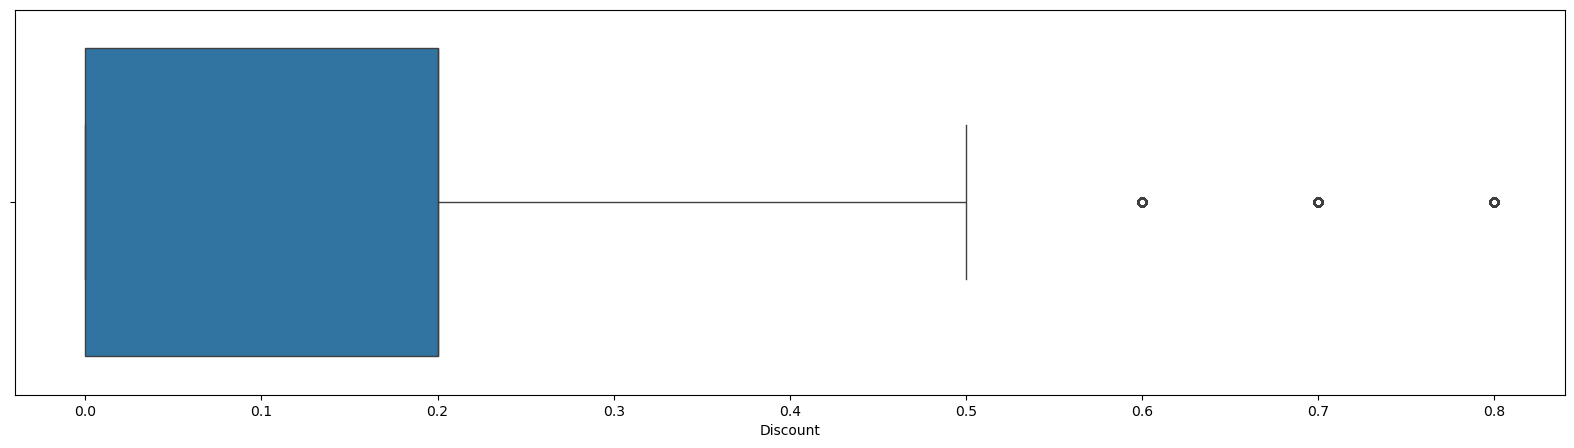

In [114]:
# Creating a boxplot to check by visualizing discount distribution:
sns.boxplot(x="Discount",data=df)
plt.show()

In [117]:
# Extracting the month name from the order date:
df["Order Month"] = pd.to_datetime(df["Order Date"]).dt.month_name()

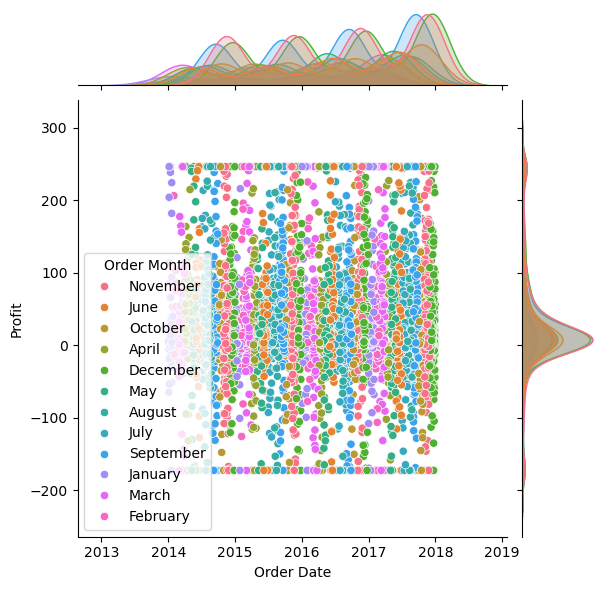

In [118]:
# Creating a joint plot to analyze profit over time:
sns.jointplot(x="Order Date", y="Profit", data=df, hue="Order Month");



<Figure size 300x100 with 0 Axes>

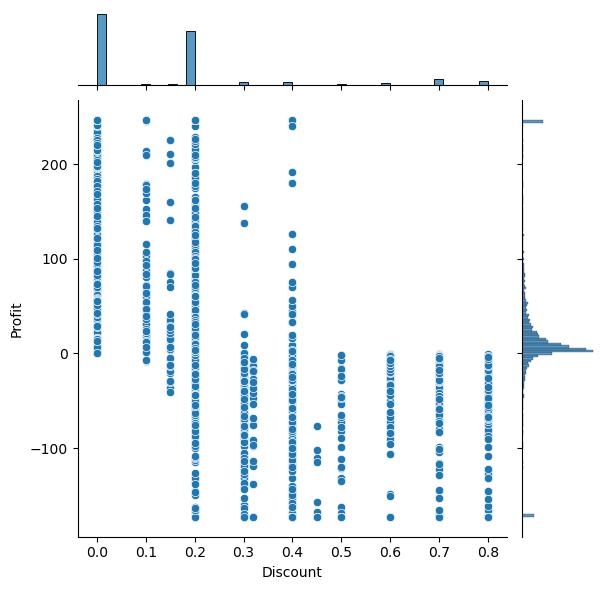

In [120]:
# Visualizing the relationship between discount and profit:
plt.figure(figsize=(3, 1))
sns.jointplot(x="Discount",y="Profit",data=df)
plt.show();

In [121]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

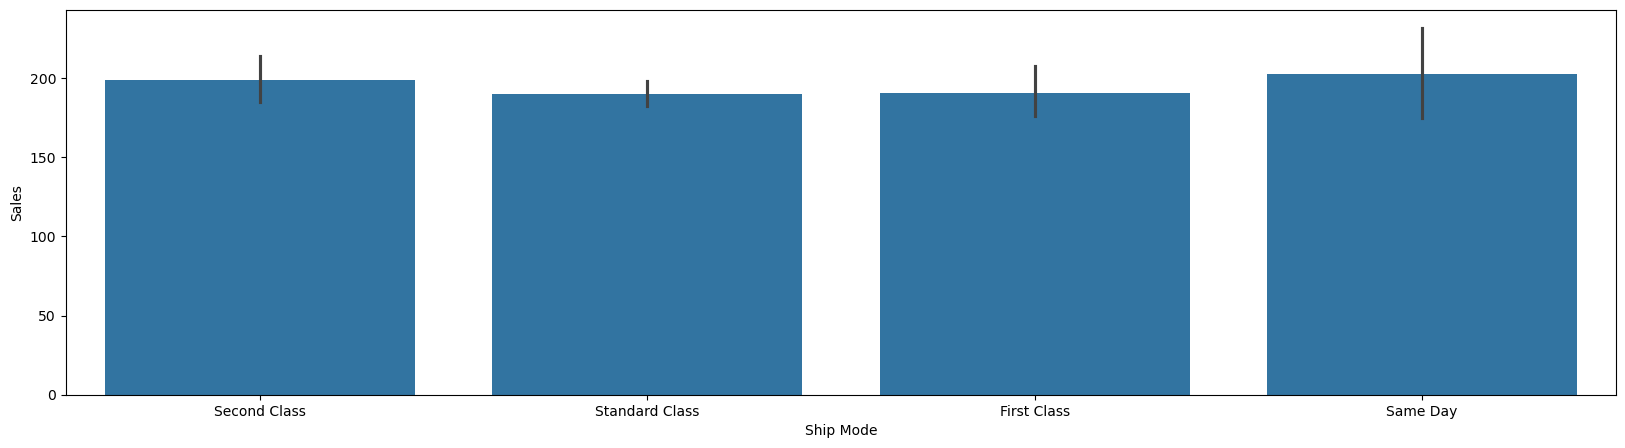

In [122]:
# Visualizing sales by shipping mode:
sns.barplot(x="Ship Mode",y="Sales",data=df)
plt.show()


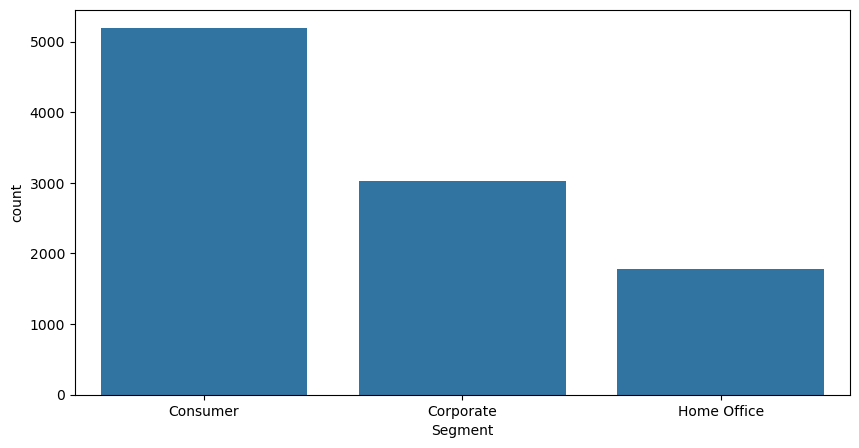

In [123]:
# Counting customer segments:
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams.update({"font.size":10})
sns.countplot(x="Segment",data=df)
plt.show()

[]

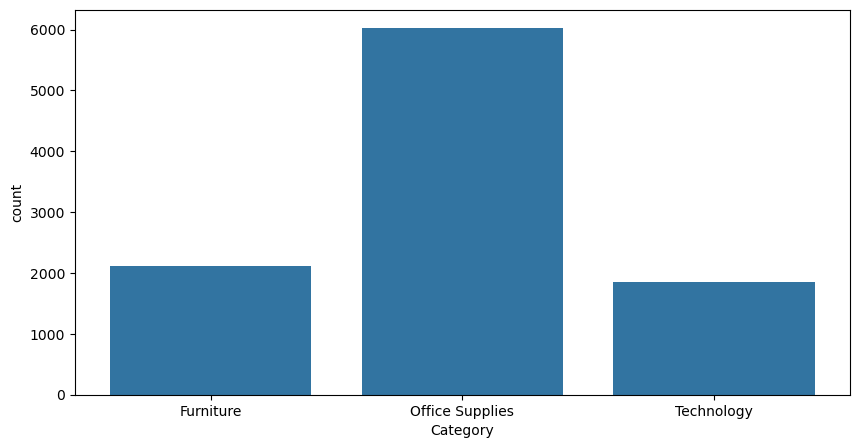

In [124]:
# Product category by sales count:
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams.update({"font.size":10})
sns.countplot(x="Category",data=df)
plt.plot()

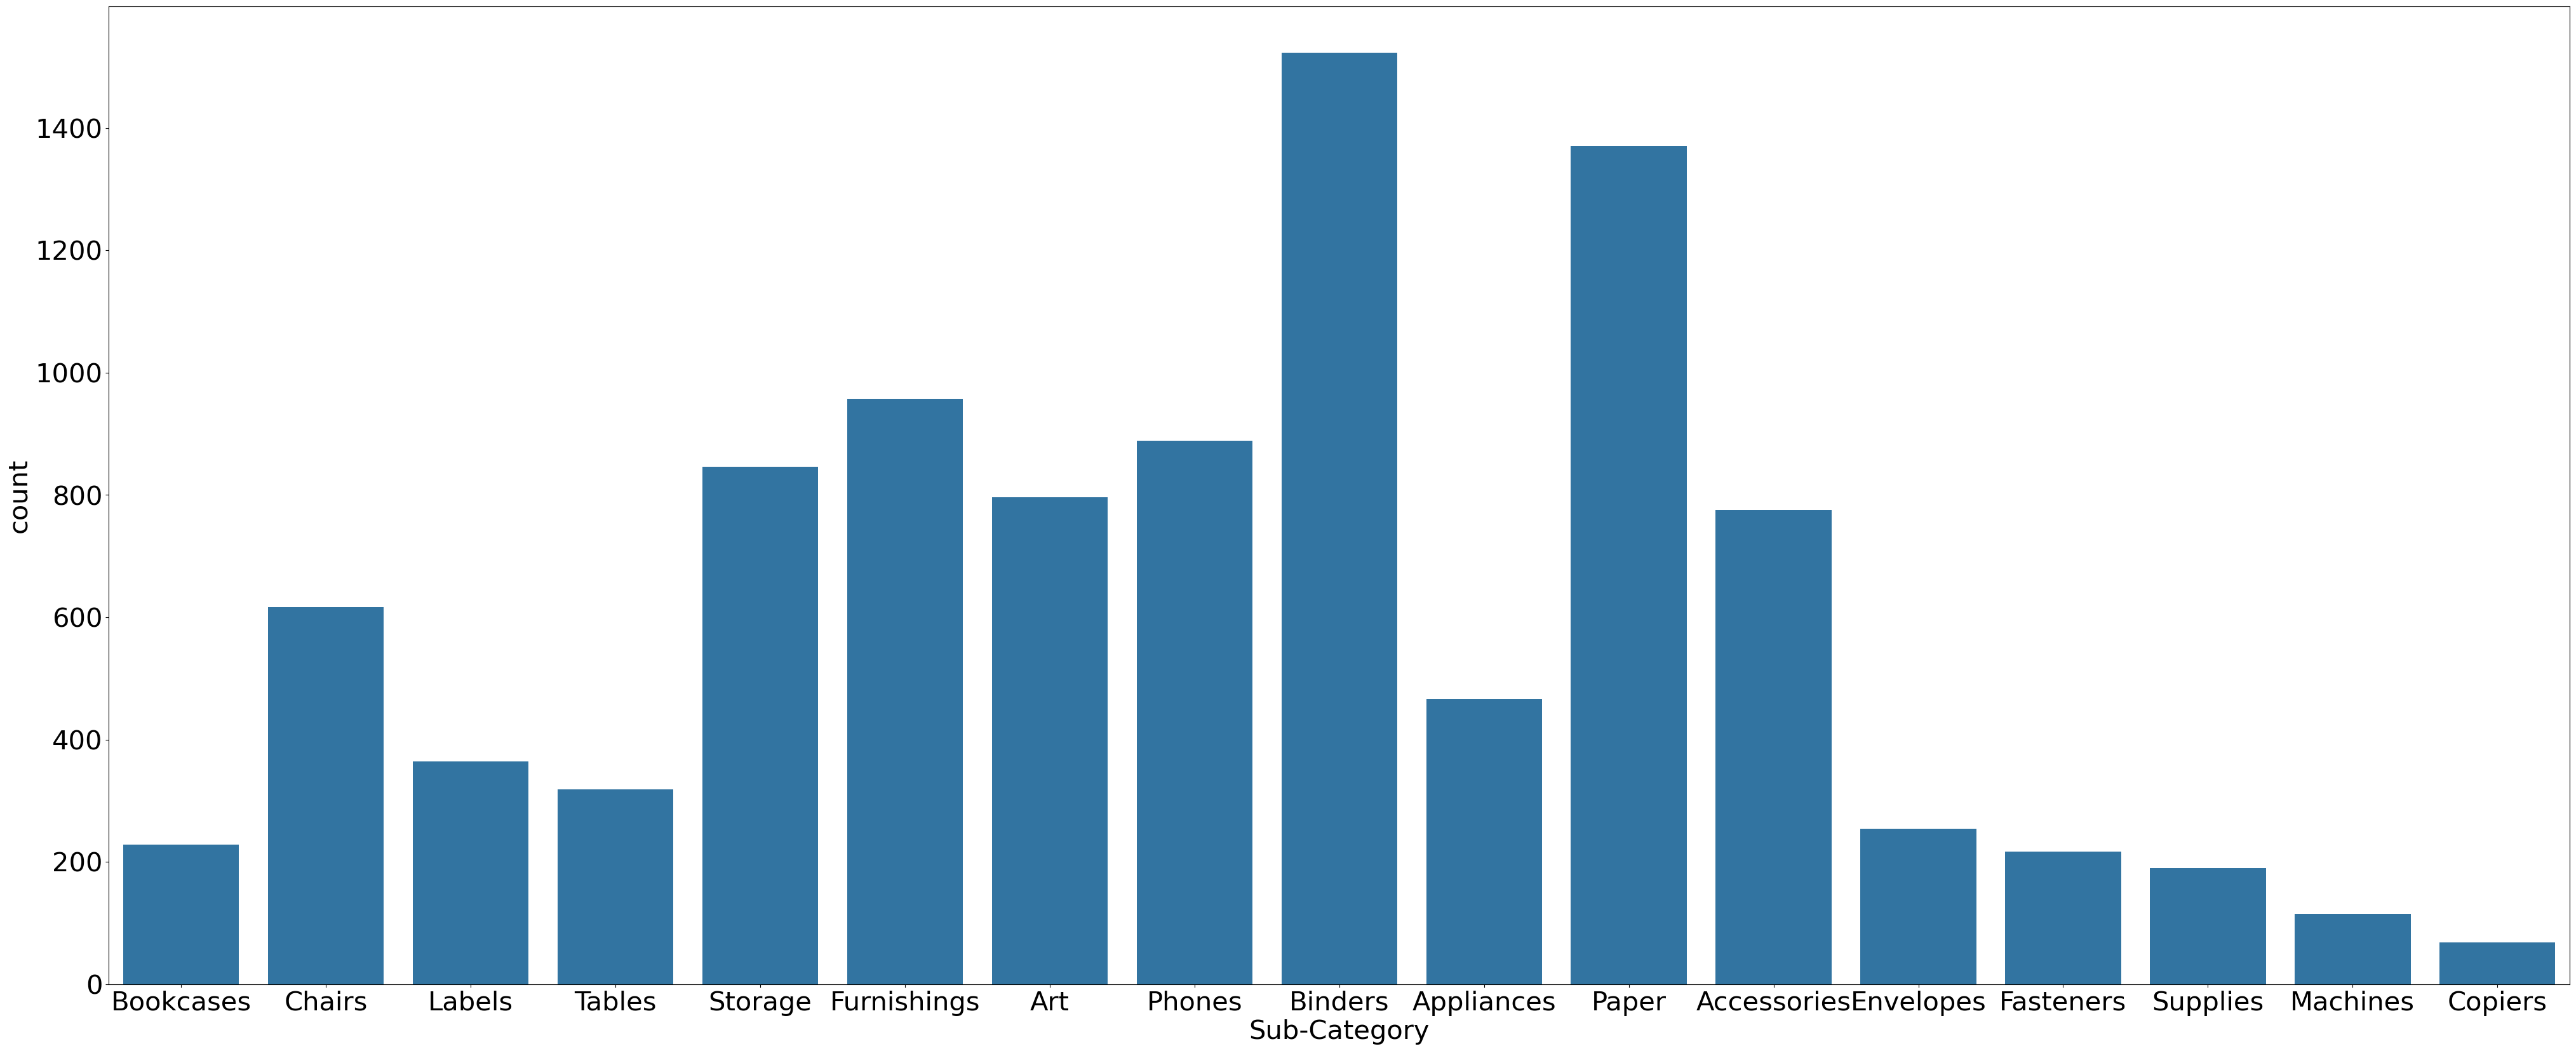

In [125]:
# Product Sales Count Graph:
plt.rcParams["figure.figsize"]=(50,20)
plt.rcParams.update({"font.size":30})
sns.countplot(x="Sub-Category",data=df)
plt.show()

In [126]:
# Filtering Sales Below 3000:
a=df[df["Sales"]<3000]

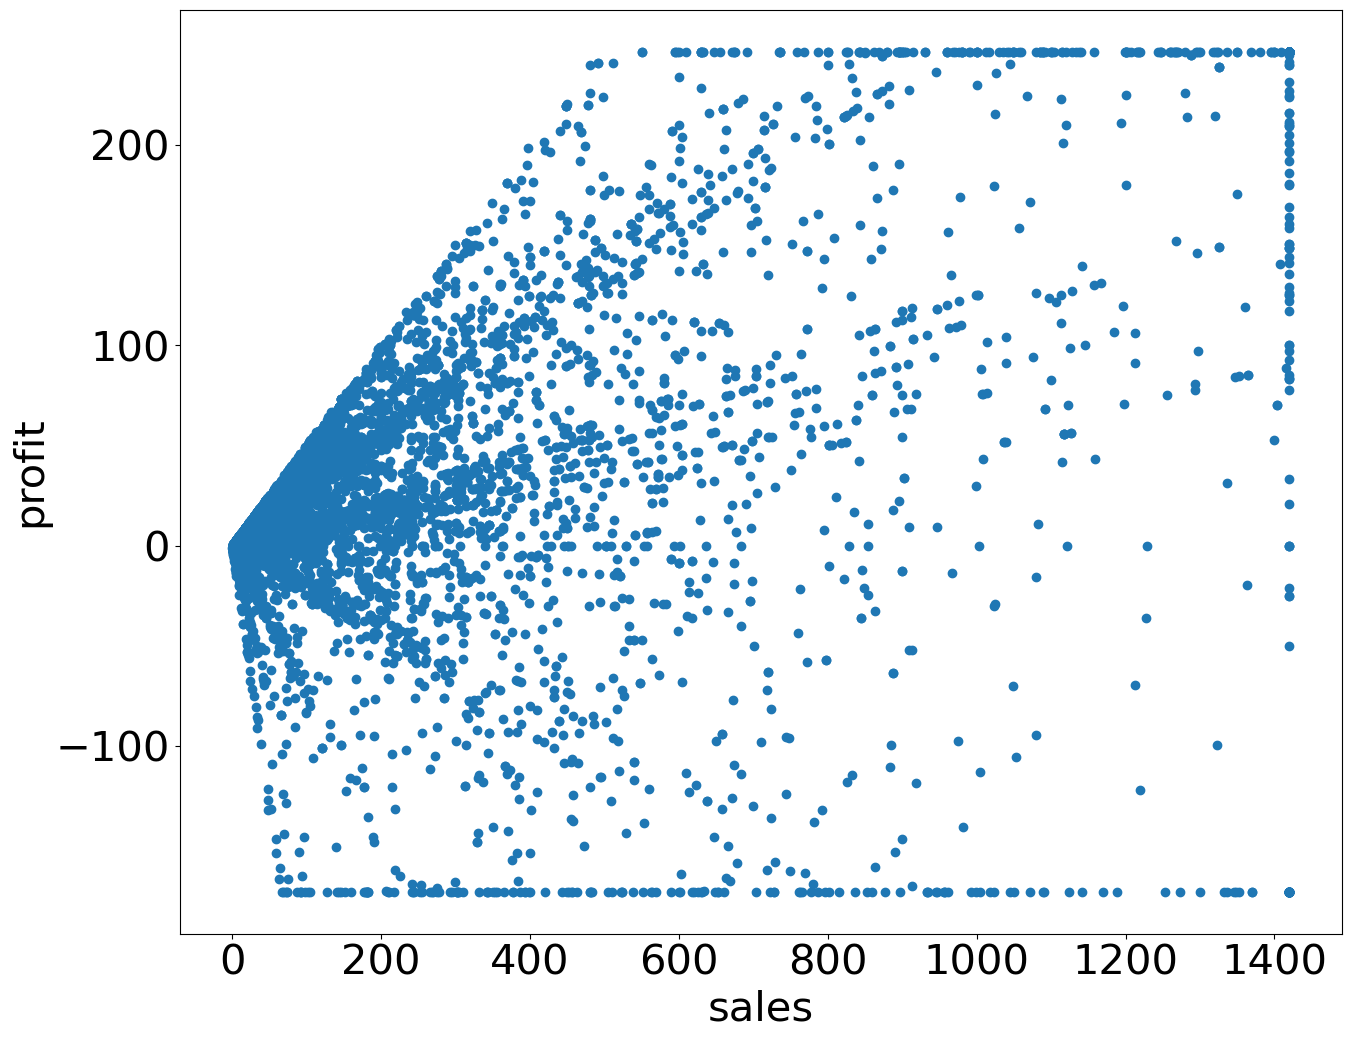

In [133]:
# Creating a Scatter Plot of Sales vs. Profit:
fig, ax = plt.subplots(figsize = (15 , 5))
ax.scatter(a["Sales"] , a["Profit"])
ax.set_xlabel('sales')
ax.set_ylabel('profit')
plt.show()

In [184]:
# # Creating dictionary maps state names to their corresponding postal codes.
state_name_to_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [185]:
# Mapping state names to their corresponding state codes:
df['state_code'] = df['State'].map(state_name_to_code)
df['state_code']

0       KY
1       KY
2       CA
3       FL
4       FL
        ..
9989    FL
9990    CA
9991    CA
9992    CA
9993    CA
Name: state_code, Length: 9994, dtype: object

In [188]:
# Aggregating total profit by state code:
state_data =df.groupby("state_code").agg({"Profit":"sum"})
state_data

,Profit
state_code,
AL,3894.29612
AR,3340.04338
AZ,-704.51704
CA,63699.93770
CO,-1062.96154
CT,3433.44232
DE,4473.34786
FL,383.79632
GA,9699.82768


In [189]:
# Calculating total profit and creating and displaying a choropleth map showing the profit distribution across the USA.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

# Group by State and calculate total profit

state_data =df.groupby("state_code").agg({"Profit":"sum"})

# Ensure hover text is based on the same DataFrame
hover_text = df['state_code']

fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,  # State names
    z=state_data['Profit'],  # Profit values
    locationmode="USA-states",  # Set location mode to USA states
    colorscale="Purples",  # Change color scale if needed
    colorbar_title="Profit in USD",  # Correct title
    hovertext=hover_text  # Set hover text
))

# Update layout
fig.update_layout(
    title_text="Total Profit by State",
    geo_scope="usa",  # Limit map scope to USA
    height=800,
)

# Show figure
fig.show()


## Model

In [300]:
# Creating required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [301]:
df.columns

Index(['Order ID', 'Order Date', 'Shipment Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Unit Price', 'ProfitperUnit', 'CostperUnit', 'PercentageofProfit', 'Order Month',
       'Order Year', 'Tenure', 'Customer Segment', 'Latency', 'state_code'],
      dtype='object')

In [302]:
df.describe()

,Order Date,Shipment Date,Sales,Quantity,Discount,Profit,Unit Price,ProfitperUnit,CostperUnit,Tenure,Latency
count,9994,9994,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994,9994
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,192.475,3.790,0.156,22.558,60.920,7.799,53.120,2016-04-30 00:07:12.259355648,3 days 22:59:46.311787072
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444,1.000,0.000,-172.606,0.336,-1319.996,0.544,2014-01-03 00:00:00,0 days 00:00:00
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280,2.000,0.000,1.729,5.470,0.723,3.474,2015-05-23 00:00:00,3 days 00:00:00
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490,3.000,0.200,8.666,16.270,2.767,12.934,2016-06-26 00:00:00,4 days 00:00:00
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940,5.000,0.200,29.364,63.940,8.703,54.522,2017-05-14 00:00:00,5 days 00:00:00
max,2017-12-30 00:00:00,2018-01-05 00:00:00,1419.919,14.000,0.800,246.414,3773.080,1679.995,4074.926,2017-12-30 00:00:00,7 days 00:00:00
std,NaN,NaN,315.674,2.225,0.206,66.677,142.927,56.075,122.251,NaN,1 days 17:56:29.766161104


In [303]:
# Filtering the data: Select rows from the DataFrame df where the Product Name is "Bush Somerset Collection Bookcase:
df[df["Product Name"]=="Bush Somerset Collection Bookcase"]

,Order ID,Order Date,Shipment Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order Month,Order Year,Tenure,Customer Segment,Latency,state_code
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914,130.980,20.957,110.023,19.0%,November,2016,2016-11-08,Hibernating,3 days,KY
5399,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,Los Angeles,California,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.150,6.549,111.333,1.310,110.023,1.2%,April,2016,2016-04-09,Potential_Loyalists,5 days,CA
8634,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,Philadelphia,Pennsylvania,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.500,-89.066,65.490,-44.533,110.023,-40.5%,August,2017,2017-08-25,Loyal_Customers,4 days,PA
9334,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,Coral Springs,Florida,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.200,-15.718,104.784,-5.239,110.023,-4.8%,May,2017,2017-05-01,Loyal_Customers,1 days,FL


In [304]:
# Filtering the data: Create a new DataFrame dfm by selecting rows where CostperUnit is greater than 4 and less than 55, and only include the columns Sales, Order Date, State, Sub-Category, and CostperUnit
dfm=df[(df["CostperUnit"]>4)& (df["CostperUnit"]<55)][["Sales","Order Date","State","Sub-Category","CostperUnit"]]
dfm.head()

,Sales,Order Date,State,Sub-Category,CostperUnit
4,22.368,2015-10-11,Florida,Storage,9.926
5,48.860,2014-06-09,California,Furnishings,4.956
8,18.504,2014-06-09,California,Binders,4.240
9,114.900,2014-06-09,California,Appliances,16.086
14,68.810,2015-11-22,Texas,Appliances,38.534


In [305]:
dfm.shape

(4697, 5)

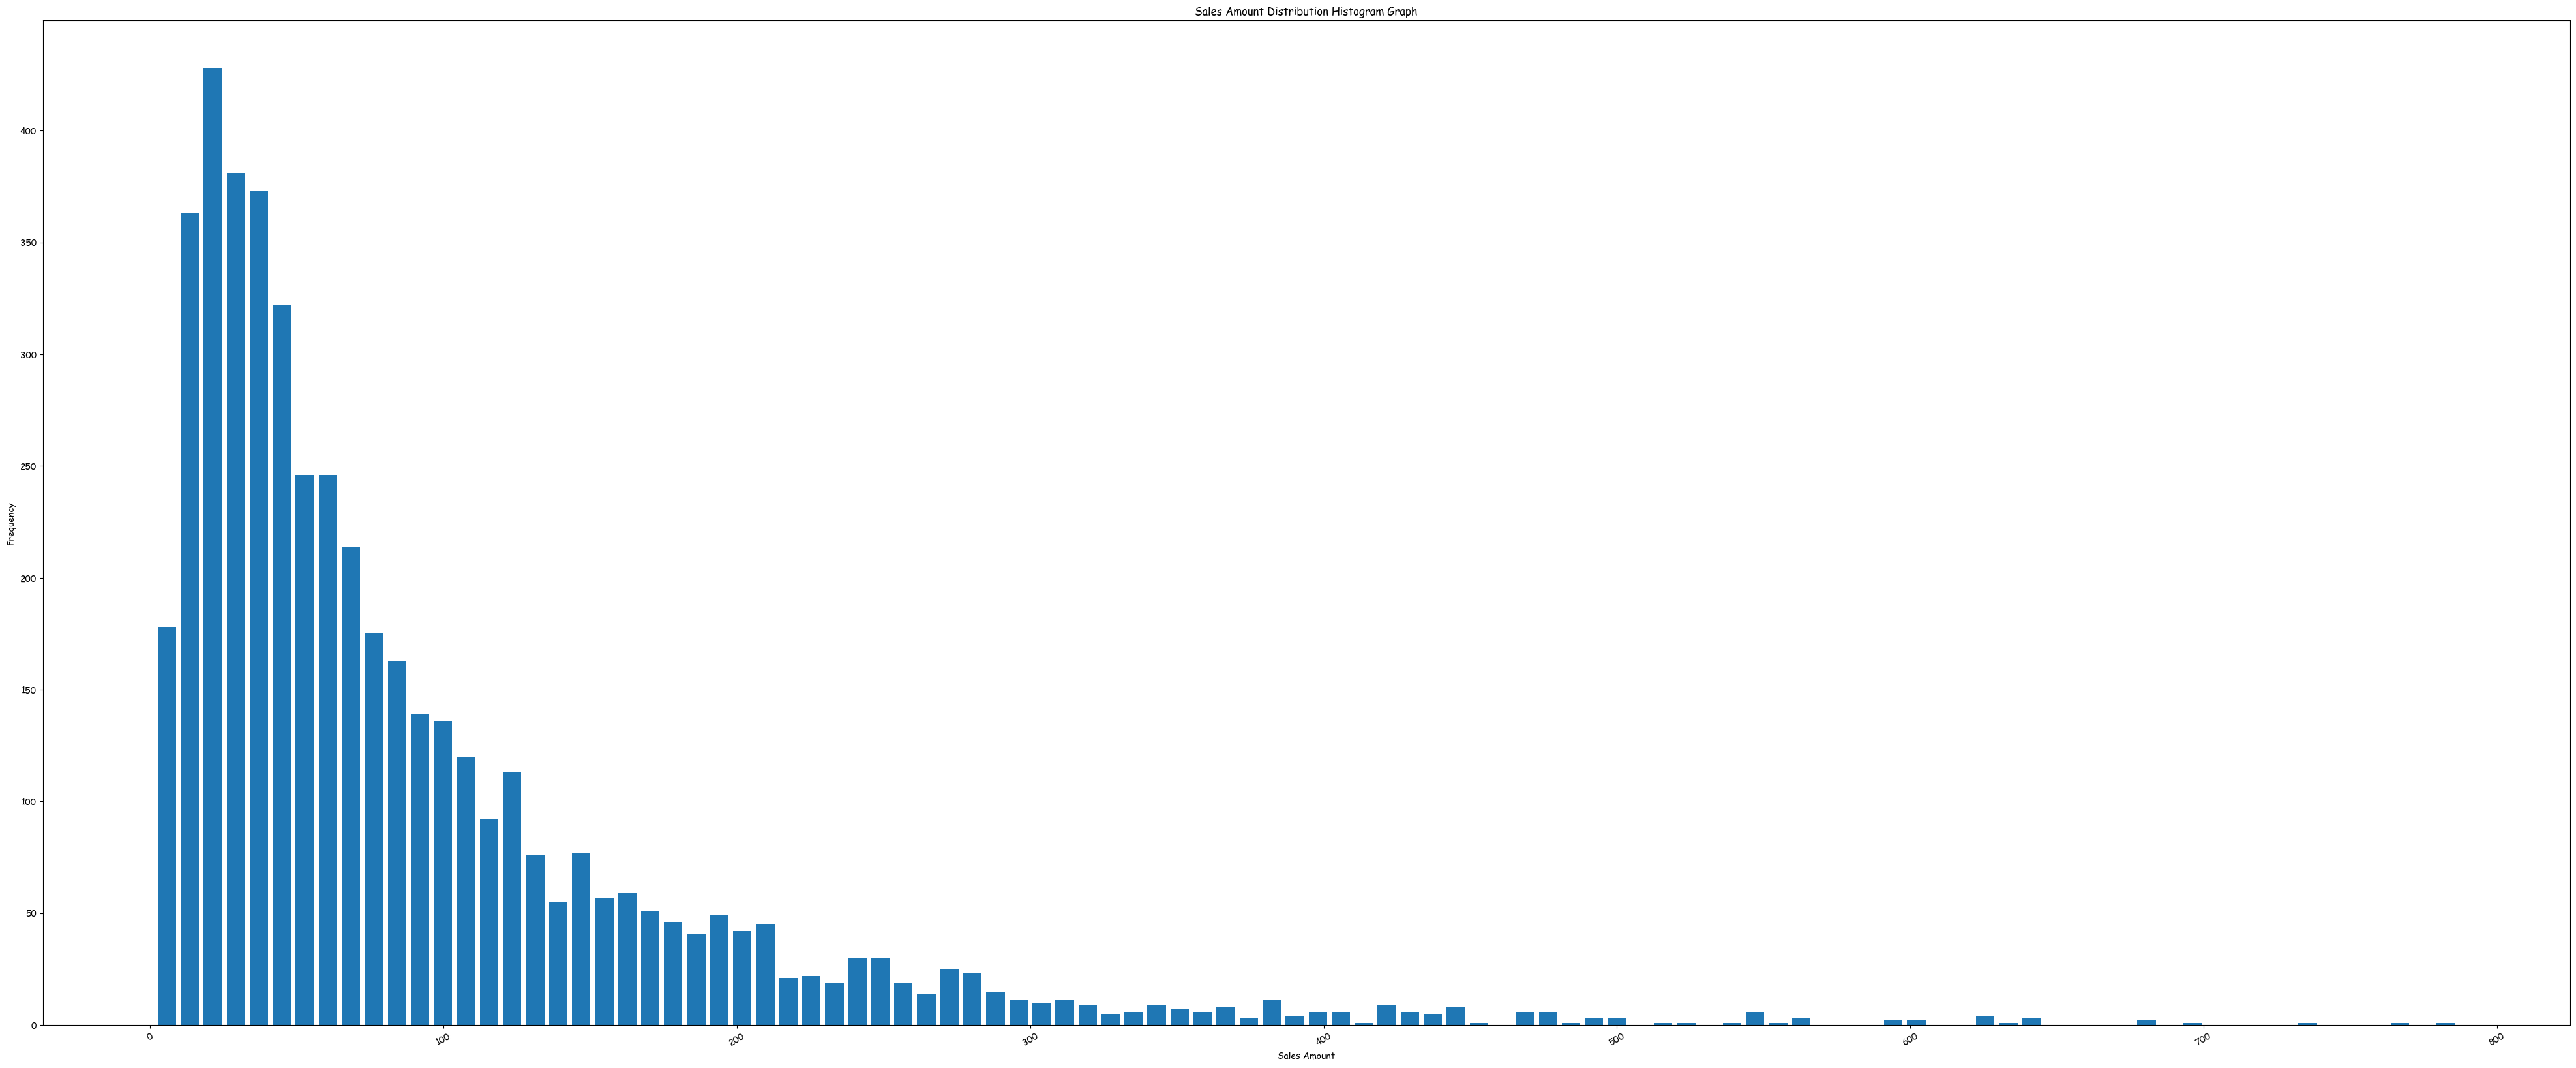

In [306]:
# Plotting a histogram to visualize the distribution of sales amounts from the filtered DataFrame dfm:
plt.hist(dfm['Sales'], bins=100,histtype="bar",rwidth=0.8,)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Sales Amount Distribution Histogram Graph')
plt.xticks(rotation=30)


# Showing Graph:
plt.show()


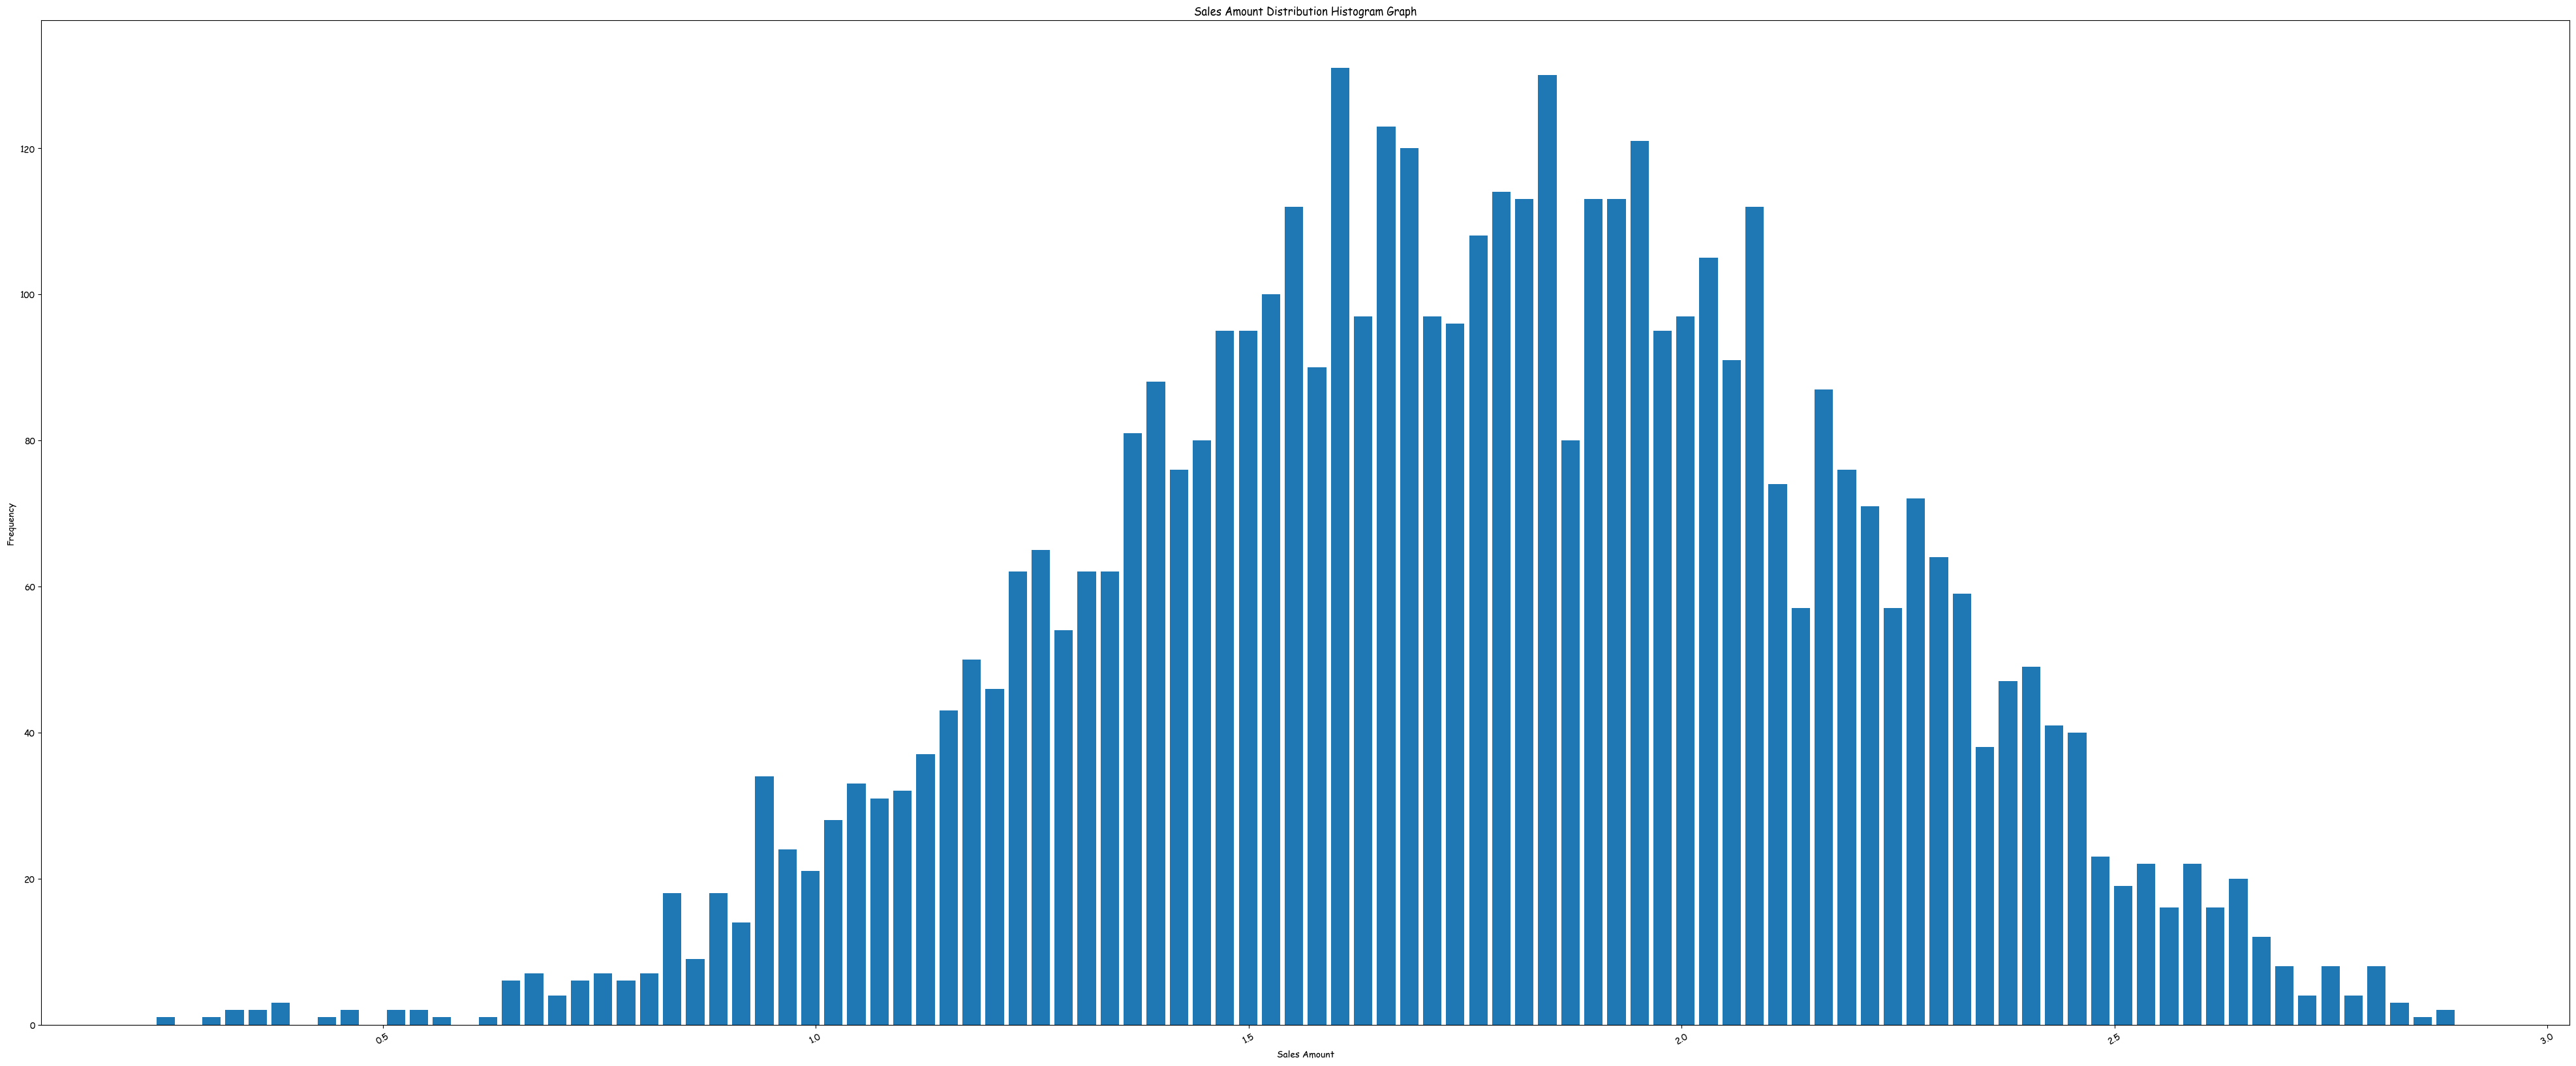

In [307]:
# Calculating the logarithm of sales amounts and plotting a histogram to visualize the distribution of these logarithmic sales values.
import math
LogSales=np.log10(dfm['Sales'])

plt.hist(LogSales, bins=100,histtype="bar",rwidth=0.8,) 
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Sales Amount Distribution Histogram Graph')
plt.xticks(rotation=30)


# Showing Graph:
plt.show()


In [308]:
# Applying the logarithmic transformation to the "Sales" column in the DataFrame dfm to normalize the sales values
dfm["Sales"]=np.log10(dfm["Sales"])
dfm["Sales"]

4      1.350
5      1.689
8      1.267
9      2.060
14     1.838
        ... 
9987   1.903
9988   2.314
9989   1.402
9990   1.964
9992   1.471
Name: Sales, Length: 4697, dtype: float64

In [309]:
# Applying the logarithmic transformation to the "CostperUnit" column in the DataFrame dfm to normalize the cost per unit values:
dfm["CostperUnit"]=np.log10(dfm["CostperUnit"])
dfm["CostperUnit"]

4      0.997
5      0.695
8      0.627
9      1.206
14     1.586
        ... 
9987   1.709
9988   1.478
9989   0.848
9990   1.582
9992   0.610
Name: CostperUnit, Length: 4697, dtype: float64

In [310]:
dfm.head()

,Sales,Order Date,State,Sub-Category,CostperUnit
4,1.350,2015-10-11,Florida,Storage,0.997
5,1.689,2014-06-09,California,Furnishings,0.695
8,1.267,2014-06-09,California,Binders,0.627
9,2.060,2014-06-09,California,Appliances,1.206
14,1.838,2015-11-22,Texas,Appliances,1.586


In [311]:
# To obtain the original value, perform the inverse logarithmic operation:
# LogSales = np.power(10, LogSales.values)
# LogSales

In [312]:
# Determining the main metrics to be used in the model and preparing the groundwork:
States = dfm['State'].unique()
Categoryno=dfm["Sub-Category"].unique()
dfm['State Number'] = dfm['State'].apply(lambda x: next((i for i, eyalet in enumerate(States, start=1) if eyalet == x), None))
dfm['Category Number'] = dfm['Sub-Category'].apply(lambda x: next((i for i, category in enumerate(Categoryno, start=1) if category == x), None))

dfm.head(20)


,Sales,Order Date,State,Sub-Category,CostperUnit,State Number,Category Number
4,1.350,2015-10-11,Florida,Storage,0.997,1,1
5,1.689,2014-06-09,California,Furnishings,0.695,2,2
8,1.267,2014-06-09,California,Binders,0.627,2,3
9,2.060,2014-06-09,California,Appliances,1.206,2,4
14,1.838,2015-11-22,Texas,Appliances,1.586,3,4
17,1.744,2014-05-13,Utah,Storage,1.357,4,1
22,1.781,2016-12-09,Nebraska,Appliances,0.805,5,4
23,1.854,2017-07-16,Pennsylvania,Chairs,1.559,6,5
26,1.957,2016-01-16,California,Accessories,1.419,2,6
28,0.983,2015-09-17,Pennsylvania,Binders,0.921,6,3


In [313]:
# Changing column name:
dfm["date"]=dfm["Order Date"]

In [314]:
del dfm["Order Date"]

In [315]:
#####################################################
# FEATURE ENGINEERING
#####################################################
dfm.head()

# Creating date_features adds various date-related features to the DataFrame:
def create_date_features(dfm):
    dfm['month'] = dfm.date.dt.month
    dfm['day_of_month'] = dfm.date.dt.day
    dfm['day_of_year'] = dfm.date.dt.dayofyear
    dfm['week_of_year'] =  dfm.date.dt.isocalendar().week
    dfm['day_of_week'] = dfm.date.dt.dayofweek
    dfm['year'] = dfm.date.dt.year
    dfm["is_wknd"] = dfm.date.dt.weekday // 5
    dfm['is_month_start'] = dfm.date.dt.is_month_start.astype(int)
    dfm['is_month_end'] = dfm.date.dt.is_month_end.astype(int)
    return dfm

In [316]:
# Create new date-related features from the 'date' column in the dataframe:
dfm = create_date_features(dfm)
dfm.tail(100)

,Sales,State,Sub-Category,CostperUnit,State Number,Category Number,date,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
9815,2.239,Florida,Paper,1.231,1,8,2015-06-08,6,8,159,24,0,2015,0,0,0
9817,2.239,Florida,Furnishings,1.261,1,2,2015-06-08,6,8,159,24,0,2015,0,0,0
9821,1.262,Florida,Binders,1.199,1,3,2015-06-08,6,8,159,24,0,2015,0,0,0
9822,2.184,California,Appliances,1.565,2,4,2014-08-15,8,15,227,33,4,2014,0,0,0
9823,1.968,California,Paper,1.231,2,8,2014-08-15,8,15,227,33,4,2014,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,1.903,Georgia,Accessories,1.709,26,6,2017-11-17,11,17,321,46,4,2017,0,0,0
9988,2.314,Georgia,Phones,1.478,26,10,2017-11-17,11,17,321,46,4,2017,0,0,0
9989,1.402,Florida,Furnishings,0.848,1,2,2014-01-21,1,21,21,4,1,2014,0,0,0
9990,1.964,California,Furnishings,1.582,2,2,2017-02-26,2,26,57,8,6,2017,1,0,0


In [317]:
# Adding inflation values to data 
inflation= [1.6, 0.12, 2.13, 2.11, 1.91]

dfm['inflation'] = dfm['year'].apply(lambda x: inflation[x-2014] if x >= 2014 and x <= 2018 else None)



In [318]:
dfm['month'] = dfm.date.dt.month

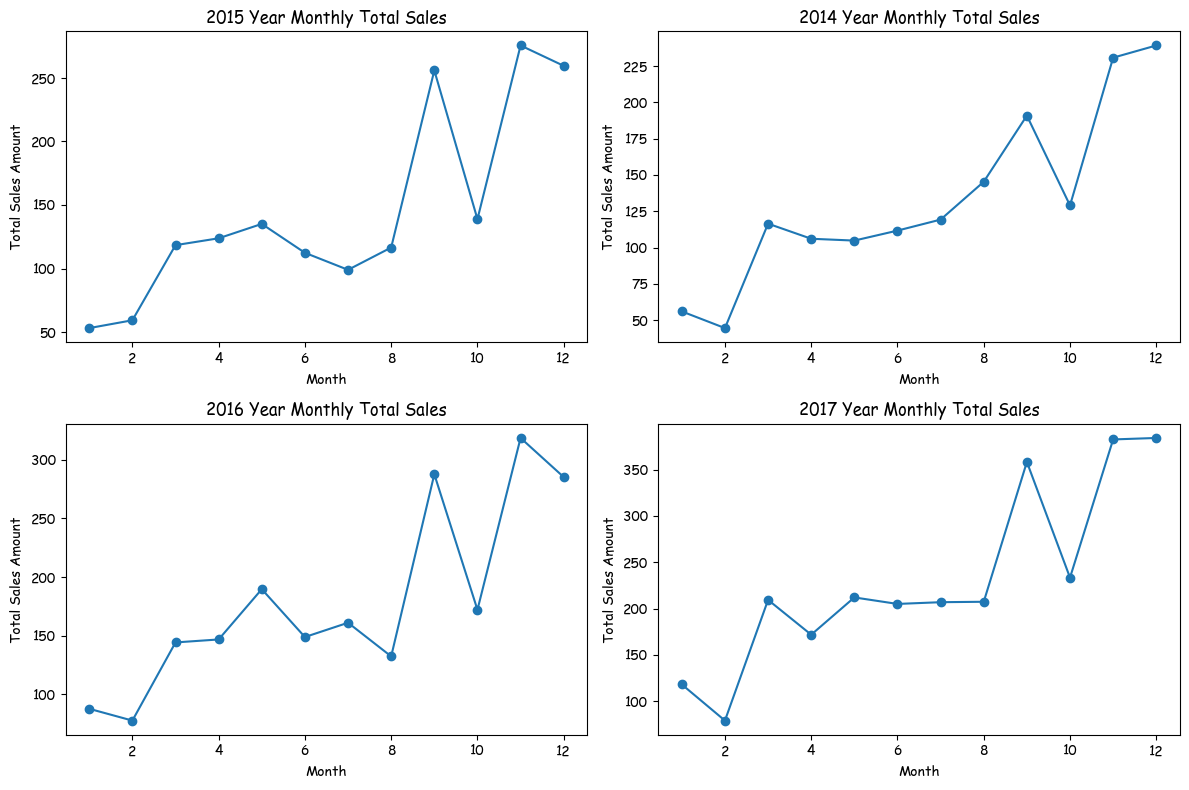

In [319]:
# Creating subplots for each year showing monthly total sales
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# List of unique years
years = dfm["year"].unique()

# Creating the figure for the plots
fig = plt.figure(figsize=(12, 8))
# Update font size
matplotlib.rcParams.update({'font.size': 10})

# Plotting monthly total sales for each year
for i, y in enumerate(years):
    # Filter data for the specific year
    year_data = dfm[dfm['year'] == y]

    # Group by month and calculate total sales
    monthly = year_data.groupby('month')['Sales'].sum()

    # Create subplot for each year
    ax = fig.add_subplot(2, 2, i+1)
    ax.plot(monthly.index, monthly, marker='o')
    ax.set_title(f'{y} Year Monthly Total Sales')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales Amount')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [320]:
# Calculate the average sales for each month in 2014:
dfm[dfm["year"]==2014].groupby(dfm["month"]).agg({"Sales":"mean"})

,Sales
month,
1,1.599
2,1.647
3,1.713
4,1.829
5,1.807
6,1.773
7,1.754
8,1.863
9,1.736


In [321]:
# Creating a US Federal Holiday Calendar and adding a new column to the DataFrame to indicate whether each date is a holiday within the specified date range from October 1, 2014, to December 31, 2017.

#US Federal Holidays
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

# Create a US Federal Holiday Calendar
cal = USFederalHolidayCalendar()

# Get the list of US holidays for the specified date range
import calendar

start_year = 2014
end_year = start_year + 3

for year in range(start_year, end_year + 1):
    holidays = cal.holidays(start=f'01.10.{year}', end=f'31.12.{year}').date
    dfm['is_holiday'] = dfm["date"].isin(holidays).astype(int)
  #holidays = cal.holidays(start='01.10.2016', end='31.12.2016').date

# Check if each date in your DataFrame is a holiday



In [322]:
dfm["date"]

4      2015-10-11
5      2014-06-09
8      2014-06-09
9      2014-06-09
14     2015-11-22
          ...    
9987   2017-11-17
9988   2017-11-17
9989   2014-01-21
9990   2017-02-26
9992   2017-02-26
Name: date, Length: 4697, dtype: datetime64[ns]

In [323]:
# Filter the DataFrame to show the first 100 entries where the date is a federal holiday.
dfm[dfm["is_holiday"]==1].head(100)

,Sales,State,Sub-Category,CostperUnit,State Number,Category Number,date,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,inflation,is_holiday
106,1.870,North Carolina,Accessories,0.849,16,6,2017-11-23,11,23,327,47,3,2017,0,0,0,2.110,1
107,1.447,North Carolina,Phones,1.413,16,10,2017-11-23,11,23,327,47,3,2017,0,0,0,2.110,1
110,1.623,New York,Furnishings,1.191,12,2,2017-12-25,12,25,359,52,0,2017,0,0,0,2.110,1
371,1.728,Texas,Storage,1.211,3,1,2017-05-29,5,29,149,22,0,2017,0,0,0,2.110,1
425,1.453,Michigan,Furnishings,0.938,9,2,2017-11-23,11,23,327,47,3,2017,0,0,0,2.110,1
426,2.459,Michigan,Binders,1.272,9,3,2017-11-23,11,23,327,47,3,2017,0,0,0,2.110,1
800,1.347,California,Furnishings,1.173,2,2,2017-02-20,2,20,51,8,0,2017,0,0,0,2.110,1
1363,1.584,Arizona,Binders,0.660,13,3,2017-11-10,11,10,314,45,4,2017,0,0,0,2.110,1
1365,2.380,Arizona,Accessories,1.663,13,6,2017-11-10,11,10,314,45,4,2017,0,0,0,2.110,1
1395,1.824,Illinois,Tables,1.561,7,16,2017-10-09,10,9,282,41,0,2017,0,0,0,2.110,1


In [324]:
# Identify categorical columns in the DataFrame that are of object type, excluding "Sub-Category" and "State":
cat_cols = [col for col in dfm.columns if dfm[col].dtypes == "O" and col not in ["Sub-Category", "State"]]
cat_cols

[]

In [325]:
# Convert categorical variables in the DataFrame to dummy/indicator variables, dropping the first category to avoid multicollinearity:

dfm = pd.get_dummies(dfm, columns=cat_cols, drop_first=True)


In [326]:
dfm.head()

,Sales,State,Sub-Category,CostperUnit,State Number,Category Number,date,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,inflation,is_holiday
4,1.350,Florida,Storage,0.997,1,1,2015-10-11,10,11,284,41,6,2015,1,0,0,0.120,0
5,1.689,California,Furnishings,0.695,2,2,2014-06-09,6,9,160,24,0,2014,0,0,0,1.600,0
8,1.267,California,Binders,0.627,2,3,2014-06-09,6,9,160,24,0,2014,0,0,0,1.600,0
9,2.060,California,Appliances,1.206,2,4,2014-06-09,6,9,160,24,0,2014,0,0,0,1.600,0
14,1.838,Texas,Appliances,1.586,3,4,2015-11-22,11,22,326,47,6,2015,1,0,0,0.120,0


In [327]:
#####################################################
# Random Noise
#####################################################

# We combined the train and test datasets. To avoid overfitting when we use all data in light gbm
# It is considered to add random noise to the data. Because we produce from #sales variable
# Random noise values are generated in the size of the data set, with a standard deviation of 1.6.

def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe)))

In [224]:
################################################ ###
# Lag/Shifted Features
################################################ ###
# Past values are used in the time series.
# These values are added to the data as a new variable in order to reach the previous values as the number of steps to be determined with light gbm.

# We will produce features related to past values why?
# The next value in the time series is most affected by the previous value. (past actual values)
# so we know that if we are working with time series we should give priority to past values. (we have to)


# Sorting is done by considering the same store, item and date breakdown on a row basis.
# I need to reach the previous value of the sales value here, but I don't know what it means
# In order to consolidate the ground, sorting is done by considering the same store, item and date breakdown on a row basis.


In [328]:
# Sort the DataFrame by 'State Number', 'Category Number', and 'date' in ascending order.
dfm.sort_values(by=["State Number","Category Number",'date'], axis=0, inplace=True)
dfm.head()


,Sales,State,Sub-Category,CostperUnit,State Number,Category Number,date,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,inflation,is_holiday
6162,1.418,Florida,Storage,0.907,1,1,2014-03-19,3,19,78,12,2,2014,0,0,0,1.600,0
9383,1.924,Florida,Storage,1.230,1,1,2014-12-23,12,23,357,52,1,2014,0,0,0,1.600,0
8556,2.177,Florida,Storage,1.311,1,1,2015-03-22,3,22,81,12,6,2015,1,0,0,0.120,0
1195,1.392,Florida,Storage,1.051,1,1,2015-09-15,9,15,258,38,1,2015,0,0,0,0.120,0
4,1.350,Florida,Storage,0.997,1,1,2015-10-11,10,11,284,41,6,2015,1,0,0,0.120,0


In [329]:
# Create lag features for the 'Sales' column based on specified lag values, grouped by 'Category Num

def lag_features(dataframe, lags):
    for lag in lags:
        shifted_column = dataframe.groupby(["Category Number","State Number"])["Sales"].transform(lambda x: x.shift(lag))
        dataframe['sales_lag_' + str(lag)] = shifted_column + random_noise(dataframe)
    return dataframe


In [330]:
# # Apply the lag_features function to create sales lag features for 1 to 7 days and 30 days, updating the dataframe.

dfm = lag_features(dfm, [1,2,3,4,5,6,7,30])
dfm.head()

,Sales,State,Sub-Category,CostperUnit,State Number,Category Number,date,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30
6162,1.418,Florida,Storage,0.907,1,1,2014-03-19,3,19,78,12,2,2014,0,0,0,1.600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9383,1.924,Florida,Storage,1.230,1,1,2014-12-23,12,23,357,52,1,2014,0,0,0,1.600,0,1.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8556,2.177,Florida,Storage,1.311,1,1,2015-03-22,3,22,81,12,6,2015,1,0,0,0.120,0,-0.145,1.832,NaN,NaN,NaN,NaN,NaN,NaN
1195,1.392,Florida,Storage,1.051,1,1,2015-09-15,9,15,258,38,1,2015,0,0,0,0.120,0,2.010,-0.443,2.948,NaN,NaN,NaN,NaN,NaN
4,1.350,Florida,Storage,0.997,1,1,2015-10-11,10,11,284,41,6,2015,1,0,0,0.120,0,1.501,1.477,2.766,2.647,NaN,NaN,NaN,NaN


In [331]:
# Convert categorical columns 'State Number', 'Category Number', 'day_of_week', 'year', and 'month' into dummy/indicator variables in

dfm = pd.get_dummies(dfm, columns=['State Number', 'Category Number', 'day_of_week', "year",'month'])

In [332]:
# Retrieve the earliest date from the 'date' column in the dataframe:
dfm["date"].min()

Timestamp('2014-01-03 00:00:00')

In [333]:
# Retrieve the latest date from the 'date' column in the dataframe:
dfm["date"].max()

Timestamp('2017-12-30 00:00:00')

In [334]:
# Identify numerical columns in the dataframe excluding the 'date' column:

num_cols = [col for col in dfm.columns if dfm[col].dtypes != "O"]
num_cols=[col for col in num_cols if  col !="date"]
num_cols

['Sales',
 'CostperUnit',
 'day_of_month',
 'day_of_year',
 'week_of_year',
 'is_wknd',
 'is_month_start',
 'is_month_end',
 'inflation',
 'is_holiday',
 'sales_lag_1',
 'sales_lag_2',
 'sales_lag_3',
 'sales_lag_4',
 'sales_lag_5',
 'sales_lag_6',
 'sales_lag_7',
 'sales_lag_30',
 'State Number_1',
 'State Number_2',
 'State Number_3',
 'State Number_4',
 'State Number_5',
 'State Number_6',
 'State Number_7',
 'State Number_8',
 'State Number_9',
 'State Number_10',
 'State Number_11',
 'State Number_12',
 'State Number_13',
 'State Number_14',
 'State Number_15',
 'State Number_16',
 'State Number_17',
 'State Number_18',
 'State Number_19',
 'State Number_20',
 'State Number_21',
 'State Number_22',
 'State Number_23',
 'State Number_24',
 'State Number_25',
 'State Number_26',
 'State Number_27',
 'State Number_28',
 'State Number_29',
 'State Number_30',
 'State Number_31',
 'State Number_32',
 'State Number_33',
 'State Number_34',
 'State Number_35',
 'State Number_36',
 'State

In [336]:
# Create a training dataset by filtering rows with dates between January 3, 2014, and January 1, 2017:
training = dfm[(dfm["date"] >= "2014-01-03") & (dfm["date"] < "2017-01-1")]
training.head()

,Sales,State,Sub-Category,CostperUnit,date,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6162,1.418,Florida,Storage,0.907,2014-03-19,19,78,12,0,0,0,1.600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9383,1.924,Florida,Storage,1.230,2014-12-23,23,357,52,0,0,0,1.600,0,1.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8556,2.177,Florida,Storage,1.311,2015-03-22,22,81,12,1,0,0,0.120,0,-0.145,1.832,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1195,1.392,Florida,Storage,1.051,2015-09-15,15,258,38,0,0,0,0.120,0,2.010,-0.443,2.948,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,

In [337]:
# Create a test dataset by filtering rows with dates from January 1, 2017, onward:
test=dfm[(dfm["date"] >= "2017-1-1")]
test.head()

,Sales,State,Sub-Category,CostperUnit,date,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5292,0.650,Florida,Storage,0.616,2017-06-20,20,171,25,0,0,0,2.110,0,4.741,1.284,4.731,4.758,1.674,1.606,1.360,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
8324,1.790,Florida,Storage,1.051,2017-09-08,8,251,36,0,0,0,2.110,0,0.646,4.831,0.889,1.250,-1.792,-0.770,2.864,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
43,1.981,Florida,Storage,1.634,2017-09-19,19,262,38,0,0,0,2.110,0,0.529,0.574,1.987,2.692,2.418,3.424,1.569,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
7961,1.910,Florida,Storage,1.304,2017-11-18,18,322,46,1,0,0,2.110,0,2.373,1.987,-1.561,-0.802,-1.354,2.694,0.497,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,F

In [338]:
# Generate a list of column names excluding specific columns related to sales, date, sub-category, state, year, and city:
cols = [cols for cols in dfm.columns if cols not in [ "Sales","date","Sub-Category","State","year","City"]]
cols

['CostperUnit',
 'day_of_month',
 'day_of_year',
 'week_of_year',
 'is_wknd',
 'is_month_start',
 'is_month_end',
 'inflation',
 'is_holiday',
 'sales_lag_1',
 'sales_lag_2',
 'sales_lag_3',
 'sales_lag_4',
 'sales_lag_5',
 'sales_lag_6',
 'sales_lag_7',
 'sales_lag_30',
 'State Number_1',
 'State Number_2',
 'State Number_3',
 'State Number_4',
 'State Number_5',
 'State Number_6',
 'State Number_7',
 'State Number_8',
 'State Number_9',
 'State Number_10',
 'State Number_11',
 'State Number_12',
 'State Number_13',
 'State Number_14',
 'State Number_15',
 'State Number_16',
 'State Number_17',
 'State Number_18',
 'State Number_19',
 'State Number_20',
 'State Number_21',
 'State Number_22',
 'State Number_23',
 'State Number_24',
 'State Number_25',
 'State Number_26',
 'State Number_27',
 'State Number_28',
 'State Number_29',
 'State Number_30',
 'State Number_31',
 'State Number_32',
 'State Number_33',
 'State Number_34',
 'State Number_35',
 'State Number_36',
 'State Number_37

In [339]:
# Separate the features (X_train) and target variable (y_train) for the training dataset, excluding the specified columns:
X_train=training[cols]
y_train=training["Sales"]
X_train.head()

,CostperUnit,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6162,0.907,19,78,12,0,0,0,1.600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9383,1.230,23,357,52,0,0,0,1.600,0,1.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8556,1.311,22,81,12,1,0,0,0.120,0,-0.145,1.832,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1195,1.051,15,258,38,0,0,0,0.120,0,2.010,-0.443,2.948,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0.997,11,284,41,1,0,0,0.120,0,1.501,1.477,2.766,2.647,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [340]:
# Separate the features (X_test) and target variable (y_test) for the test dataset, excluding the specified columns:
X_test=test[cols]
y_test=test["Sales"]
X_test.head()

,CostperUnit,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5292,0.616,20,171,25,0,0,0,2.110,0,4.741,1.284,4.731,4.758,1.674,1.606,1.360,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
8324,1.051,8,251,36,0,0,0,2.110,0,0.646,4.831,0.889,1.250,-1.792,-0.770,2.864,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
43,1.634,19,262,38,0,0,0,2.110,0,0.529,0.574,1.987,2.692,2.418,3.424,1.569,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
7961,1.304,18,322,46,1,0,0,2.110,0,2.373,1.987,-1.561,-0.802,-1.354,2.694,0.497,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
8564,1.582,30,120,17,1,0,1,2.110,0,5.367,4.553,3.800,1.729,-0.346,1.837,-0.355,NaN,True,False,False,False,Fals

In [341]:
y_test.shape

(1581,)

In [342]:
X_train.shape

(3116, 104)

In [343]:
y_train

6162   1.418
9383   1.924
8556   2.177
1195   1.392
4      1.350
        ... 
9157   2.415
8150   2.152
4577   0.982
6000   1.961
5671   2.147
Name: Sales, Length: 3116, dtype: float64

In [344]:
X_test.head()

,CostperUnit,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5292,0.616,20,171,25,0,0,0,2.110,0,4.741,1.284,4.731,4.758,1.674,1.606,1.360,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
8324,1.051,8,251,36,0,0,0,2.110,0,0.646,4.831,0.889,1.250,-1.792,-0.770,2.864,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
43,1.634,19,262,38,0,0,0,2.110,0,0.529,0.574,1.987,2.692,2.418,3.424,1.569,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
7961,1.304,18,322,46,1,0,0,2.110,0,2.373,1.987,-1.561,-0.802,-1.354,2.694,0.497,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
8564,1.582,30,120,17,1,0,1,2.110,0,5.367,4.553,3.800,1.729,-0.346,1.837,-0.355,NaN,True,False,False,False,Fals

In [345]:
X_test.shape

(1581, 104)

In [346]:
y_test

5292   0.650
8324   1.790
43     1.981
7961   1.910
8564   2.344
        ... 
3052   1.579
4362   2.120
4363   1.414
7894   1.916
7896   2.651
Name: Sales, Length: 1581, dtype: float64

In [347]:
#X = X_train
#y = y_train

In [246]:
y_train.shape

(3116,)

## LGBM

In [348]:

########################
# Custom Cost Function
########################

# MAE: mean absolute error
# MAPE: mean absolute percentage error

# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)


# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
# real value:10         | 10 - 40 | / (|10| + |40|) / 2
# predicted value: 40


#preds: predicted values
#target: real values

def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

#5/27.5
#5/62.5
#5/65

In [349]:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [350]:
#####################################################
# Loading Libraries
#######################################################
import time
import numpy as np
import pandas as pd

#pip install lightgbm

import lightgbm as lgb
import warnings

#from helpers.data_prep import *

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


In [351]:
lgb_params = {'metric': {'mae'}, # error calculation method to be used for loss function
              'num_leaves': 10, # maximum number of elements
              'learning_rate': 0.02, # coefficient to be used in calculating loss function
              'feature_fraction': 0.8, # maximum number of variables to use
              'max_depth': 2, # maximum depth of tree
              'verbose': 0, # parameter specifying the output format
              'num_boost_round': 800, # iteration count (specifies how many iterations I will model now)
              'early_stopping_rounds': 100, # number of early stop calculations when no improvement is seen: check if the error drops every 250 rows or not!
              'nthread': -1} # number of CPU cores to use

# metric mae: l1, absolute loss, mean_absolute_error, regression_l1
# l2, square loss, mean_squared_error, mse, regression_l2, regression
# rmse, root square loss, root_mean_squared_error, l2_root
# mape, MAPE loss, mean_absolute_percentage_error
# learning_rate: shrinkage_rate, eta
# num_boost_round: n_estimators, number of boosting iterations.
# nthread: num_thread, nthread, nthreads, n_jobs


In [352]:
lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_test, label=y_test, reference=lgbtrain, feature_name=cols)

In [353]:
# LGBM model object:
model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval], # validasyon dataset
                  num_boost_round=lgb_params['num_boost_round'], # iterasyon
                  callbacks=[lgb.early_stopping(stopping_rounds=40), lgb.log_evaluation(40)])
                

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 40 rounds
[40]	training's l1: 0.262536	valid_1's l1: 0.27539
[80]	training's l1: 0.239786	valid_1's l1: 0.255381
[120]	training's l1: 0.23056	valid_1's l1: 0.246875
[160]	training's l1: 0.225265	valid_1's l1: 0.242085
[200]	training's l1: 0.221783	valid_1's l1: 0.238827
[240]	training's l1: 0.219192	valid_1's l1: 0.236625
[280]	training's l1: 0.217114	valid_1's l1: 0.234833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	training's l1: 0.215436	valid_1's l1: 0.233409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [354]:
# predicted validation evaluations with the best model team
y_pred_val = model.predict(X_test, num_iteration=model.best_iteration)
smape(np.expm1(y_pred_val), np.expm1(y_test)) #error calculation for predicted value, validation error


27.801705175637174

In [355]:
y_pred_val.mean()

1.7524985512603024

In [356]:
y_test.mean()

1.750473267048477

## Function which calculates different machine learning model

In [359]:
# Models
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Styling
%matplotlib inline
from termcolor import colored, cprint
#mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "cursive"

In [360]:
from sklearn.preprocessing import StandardScaler

#StandardScaler örneği oluşturma
scaler = StandardScaler()

#Standardizasyon işlemi
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [361]:
X_train_scaled=X_train_scaled.astype(np.float64)
X_test=X_test.astype(np.float64)
X_train


,CostperUnit,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,inflation,is_holiday,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_30,State Number_1,State Number_2,State Number_3,State Number_4,State Number_5,State Number_6,State Number_7,State Number_8,State Number_9,State Number_10,State Number_11,State Number_12,State Number_13,State Number_14,State Number_15,State Number_16,State Number_17,State Number_18,State Number_19,State Number_20,State Number_21,State Number_22,State Number_23,State Number_24,State Number_25,State Number_26,State Number_27,State Number_28,State Number_29,State Number_30,State Number_31,State Number_32,State Number_33,State Number_34,State Number_35,State Number_36,State Number_37,State Number_38,State Number_39,State Number_40,State Number_41,State Number_42,State Number_43,State Number_44,State Number_45,State Number_46,State Number_47,State Number_48,Category Number_1,Category Number_2,Category Number_3,Category Number_4,Category Number_5,Category Number_6,Category Number_7,Category Number_8,Category Number_9,Category Number_10,Category Number_11,Category Number_12,Category Number_13,Category Number_14,Category Number_15,Category Number_16,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2014,year_2015,year_2016,year_2017,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6162,0.907,19,78,12,0,0,0,1.600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9383,1.230,23,357,52,0,0,0,1.600,0,1.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8556,1.311,22,81,12,1,0,0,0.120,0,-0.145,1.832,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1195,1.051,15,258,38,0,0,0,0.120,0,2.010,-0.443,2.948,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0.997,11,284,41,1,0,0,0.120,0,1.501,1.477,2.766,2.647,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [363]:
# Parameters
class PARAM:
    RANDOM_STATE = 116
    VERBOSE = 0

# Scaling function
def Scaler(train_X, val_X):
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(train_X)
    scaled_val = scaler.transform(val_X)
    return scaled_train, scaled_val

# Define models
xgbr = XGBRegressor(random_state=PARAM.RANDOM_STATE)
lgbr = lgb.LGBMRegressor(random_state=PARAM.RANDOM_STATE)
cbr = CatBoostRegressor(random_state=PARAM.RANDOM_STATE, verbose=PARAM.VERBOSE)  # CatBoost retained

classifiers_name = ['XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor']
color_sequence = ['red', 'green', 'blue']
classifiers = [xgbr, lgbr, cbr]  # LinearRegression removed
mae_score = []
mse_score = []
rmse_score = []
R2_score = []

# Train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=PARAM.RANDOM_STATE)

val_preds_list = []  # List to store prediction results.

for idx, classifier in enumerate(classifiers):
    mae = 0
    mse = 0
    rmse = 0
    r2score = 0
    print(colored('Classifier:', color_sequence[idx]), colored(classifiers_name[idx], color_sequence[idx]), '\n\n')
    
    # Scaling
    x_train, x_val = Scaler(X_train, X_test)
    Y_train, y_val = y_train, y_test

    # Model training
    model = classifier.fit(x_train, Y_train)
    
    # Making predictions
    val_preds = model.predict(x_val)
    val_preds_list.append(val_preds)  # Add predictions to the list

    # Calculate errors
    mae += mean_absolute_error(y_val, val_preds)
    mse += mean_squared_error(y_val, val_preds)
    rmse += np.sqrt(mean_squared_error(y_val, val_preds))
    r2score += r2_score(y_val, val_preds)

    # Print results
    print('MAE Score: ', mae)
    print('MSE Score: ', mse)
    print('RMSE Score: ', rmse)
    print('R2 Score: ', r2score, '\n\n')

    # Append scores to lists
    mae_score.append(round(mae, 2))
    mse_score.append(round(mse, 2))
    rmse_score.append(round(rmse, 2))
    R2_score.append(round(r2score, 2))
    print('---' * 20, '\n')


Classifier: XGBRegressor 


MAE Score:  0.24592752280331506
MSE Score:  0.09461562100525392
RMSE Score:  0.3075965230708142
R2 Score:  0.49050475818157246 


------------------------------------------------------------ 

Classifier: LGBMRegressor 


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 3116, number of used features: 78
[LightGBM] [Info] Start training from score 1.762298
MAE Score:  0.23950444848663144
MSE Score:  0.08875997186606152
RMSE Score:  0.29792611813344183
R2 Score:  0.5220368175019994 


------------------------------------------------------------ 

Classifier: CatBoostRegressor 


MAE Score:  0.23019317831763567
MSE Score:  0.08173926728439507
RMSE Score:  0.28590079972674975
R2 Score:  0.559842578

In [364]:
# Perform the inverse logarithmic operation to obtain the original value:
for i in [0,1,2]:
    val_preds_list[i]= np.power(10, val_preds_list[i])
    print(val_preds_list[i])



[  7.816852  30.590782 132.85365  ...  25.076591  35.066887 165.9742  ]
[ 22.00854646  33.5880878  134.68302451 ...  23.42559073  37.55402897
 140.61954589]
[ 15.97707734  29.99179841 111.374231   ...  22.45742638  34.36324041
 157.59712159]


In [365]:
y_test= np.power(10,y_test)
y_test

5292     4.464
8324    61.680
43      95.616
7961    81.360
8564   220.704
         ...  
3052    37.940
4362   131.940
4363    25.920
7894    82.400
7896   447.840
Name: Sales, Length: 1581, dtype: float64

In [366]:
y_test.mean()

89.26581771030993

In [367]:
val_preds_list[0].mean()

74.24618

In [368]:
rmse = mean_squared_error(y_test, val_preds_list[2], squared=False)
rmse

74.11968250046348

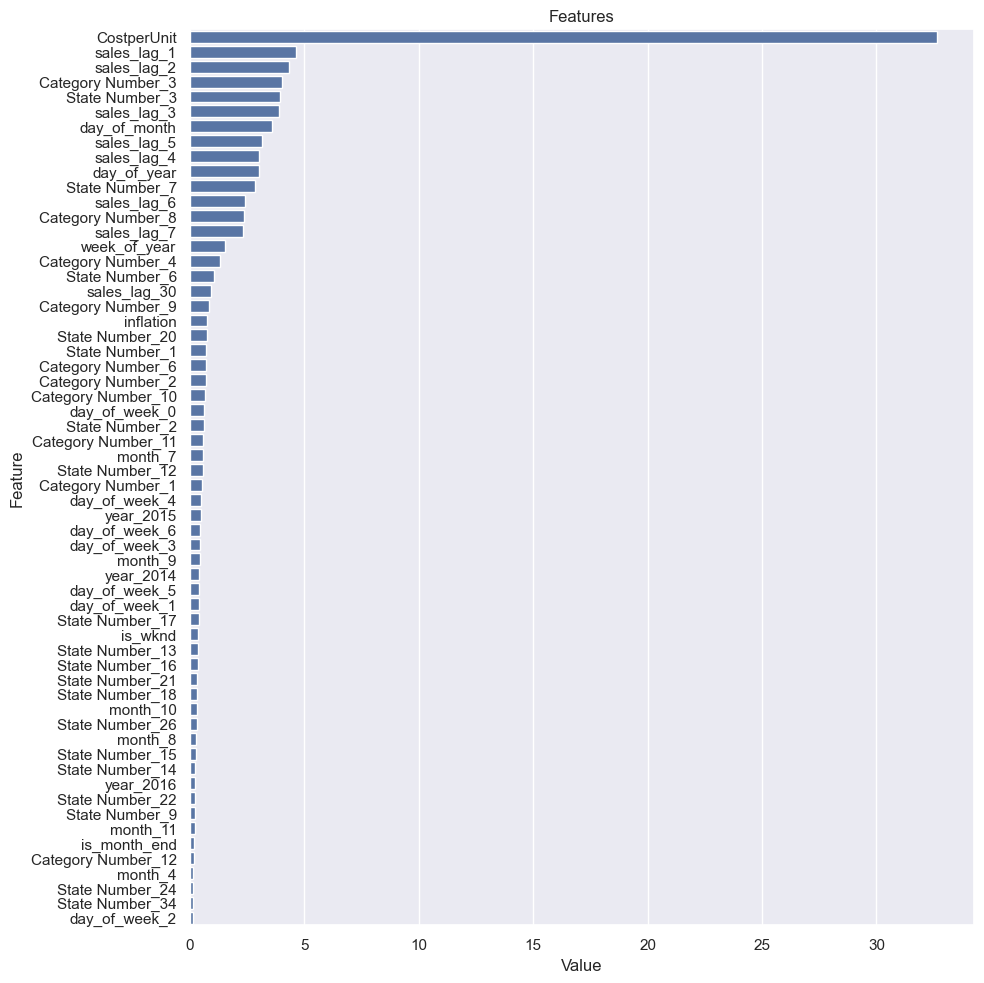

In [374]:
# Finding the importance level of every feature in the model
def plot_importance(model, features, num=len(X_train)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:60])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
plot_importance(model, X_train)

In [1150]:
df_hibrit=pd.read_excel("df_hibrit.xlsx",sheet_name="df_hibrit")
df_hibrit[df_hibrit]

ValueError: Boolean array expected for the condition, not int64

In [ ]:
#hata hesabı
mae = mean_absolute_error( df_hibrit["real"],df_hibrit["hibrit"])
mse = mean_squared_error(df_hibrit["real"],df_hibrit["hibrit"])
rmse = np.sqrt(mse)
r2 = r2_score(df_hibrit["real"],df_hibrit["hibrit"])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

In [ ]:
df_hibrit["hibrit"].mean()

In [ ]:
rmse = mean_squared_error(y_test, df_hibrit["hibrit"], squared=False)
rmse

In [ ]:
#FOLD ÖRNEKLİ MODEL FONKSİYONU

#class PARAM:
    FOLD = 3
    RANDOM_STATE = 116
    VERBOSE = 0
    
# scaling function
#def Scaler(train_X, val_X):
    scaler = StandardScaler(),s
    scaled_train = scaler.fit_transform(train_X)
    scaled_val = scaler.transform(val_X)
    return scaled_train, scaled_val

# define models
xgbr = XGBRegressor(random_state = PARAM.RANDOM_STATE)
lgbr = lgb.LGBMRegressor(random_state = PARAM.RANDOM_STATE)
cbr = CatBoostRegressor(random_state = PARAM.RANDOM_STATE, verbose = PARAM.VERBOSE)
rf = RandomForestRegressor(random_state = PARAM.RANDOM_STATE)
lr = LinearRegression()

classifiers_name = ['XGBRegressor','LGBMRegressor','CatBoostRegressor','RandomForestRegressor','LinearRegression']
color_sequence = ['red','blue','green','grey','yellow']
classifiers = [xgbr, lgbr, cbr, rf, lr]
mae_score = []
mse_score = []
rmse_score = []
R2_score = []

fold = KFold(n_splits=PARAM.FOLD, shuffle=True, random_state=PARAM.FOLD)

# 10 fold
#for idx, classifier in enumerate(classifiers):
    mae = 0  
    mse = 0
    rmse = 0
    r2score = 0
    print(colored('Classifier:',color_sequence[idx]) ,colored(classifiers_name[idx],color_sequence[idx]), '\n\n')
    for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X_train, y_train)):
        
        x_train, x_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        x_train, x_val = Scaler(x_train, x_val)
        Y_train, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model = classifier.fit(x_train, Y_train)
        val_preds = model.predict(x_val)
        
        mae += mean_absolute_error(y_val, val_preds) / PARAM.FOLD
        mse += mean_squared_error(y_val,val_preds) / PARAM.FOLD
        rmse += np.sqrt(mean_squared_error(y_val, val_preds)) / PARAM.FOLD
        r2score += r2_score(y_val,val_preds)/PARAM.FOLD
        
        print('Fold','{',fold_idx+1,'} ','\n\n')
        print('MAE Score: ', mean_absolute_error(y_val, val_preds))
        print('MSE Score: ', mean_squared_error(y_val,val_preds))
        print('RMSE Score: ', np.sqrt(mean_squared_error(y_val, val_preds)))
        print('R2 Score: ', r2_score(y_val,val_preds),'\n\n')
        
    mae_score.append(round(mae,2))
    mse_score.append(round(mse,2))
    rmse_score.append(round(rmse,2))
    R2_score.append(round(r2score,2))
    print('---'*20,'\n')

In [ ]:

#def plot_importance(model, features, num=len(X_train)):
  #feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
   #plt.figure(figsize=(15, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:60])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
plot_importance(lgb_model, X_train)
import re
dfm = dfm.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))